In [3]:
import  jax.numpy as jnp
import  numpy as np
from    sasha.model.common.core import Spectral
from    sasha.config.backend import  Backend, get_cp, convert_array
from    sasha.utils.plotting import plot_spectra



N_SPECTRA      =    15 


BACKEND        =    Backend.JAX
cp             =    get_cp(backend = BACKEND)
wvl            =    convert_array(np.arange(400.0,800.0),BACKEND)
cdom           =    convert_array(np.linspace(-15.0,-1.0,N_SPECTRA),BACKEND)
alpha_m_1      =    convert_array(np.linspace(0.0,1.0,N_SPECTRA),BACKEND)
z              =    convert_array(np.linspace(0.0,15.0,N_SPECTRA),BACKEND)
sdq            =    Spectral(wvl = wvl, backend = BACKEND)

In [4]:
from sasha.model.common.core import SpectralComponentLoader
# Usage example
# # Create an instance of SpectralComponentLoader
spectral_component_loader_instance = SpectralComponentLoader(wvl=wvl)
# Diagnose the loaded empirical components
print(spectral_component_loader_instance.pure_water)
print(spectral_component_loader_instance.phytoplankton)
print(spectral_component_loader_instance.bottom_components)

{'awater_file': WindowsPath('C:/Users/medalix/Desktop/Phd_Dev/sasha.v.0.0.1/src/share/env_input/awater.txt')}
{'aphy_file': WindowsPath('C:/Users/medalix/Desktop/Phd_Dev/sasha.v.0.0.1/src/share/env_input/aphys2.txt'), 'ephy_file': WindowsPath('C:/Users/medalix/Desktop/Phd_Dev/sasha.v.0.0.1/src/share/env_input/ephys2.txt'), 'abs_micro_file': WindowsPath('C:/Users/medalix/Desktop/Phd_Dev/sasha.v.0.0.1/src/share/env_input/abs_spec_micro.txt'), 'abs_nano_file': WindowsPath('C:/Users/medalix/Desktop/Phd_Dev/sasha.v.0.0.1/src/share/env_input/abs_spec_nano.txt')}
{'sand_albedo_file': WindowsPath('C:/Users/medalix/Desktop/Phd_Dev/sasha.v.0.0.1/src/share/env_input/sh_ref_mart.txt'), 'vege_albedo_file': WindowsPath('C:/Users/medalix/Desktop/Phd_Dev/sasha.v.0.0.1/src/share/env_input/target_011.txt')}


2025-03-25 17:20:40 - INFO - CdomAbsorptionModel - Initialized Cdom Absorption Model with model option: bricaud
2025-03-25 17:20:40 - INFO - CdomBackscatteringModel - Initialized Cdom Backscattering Model with model option: None


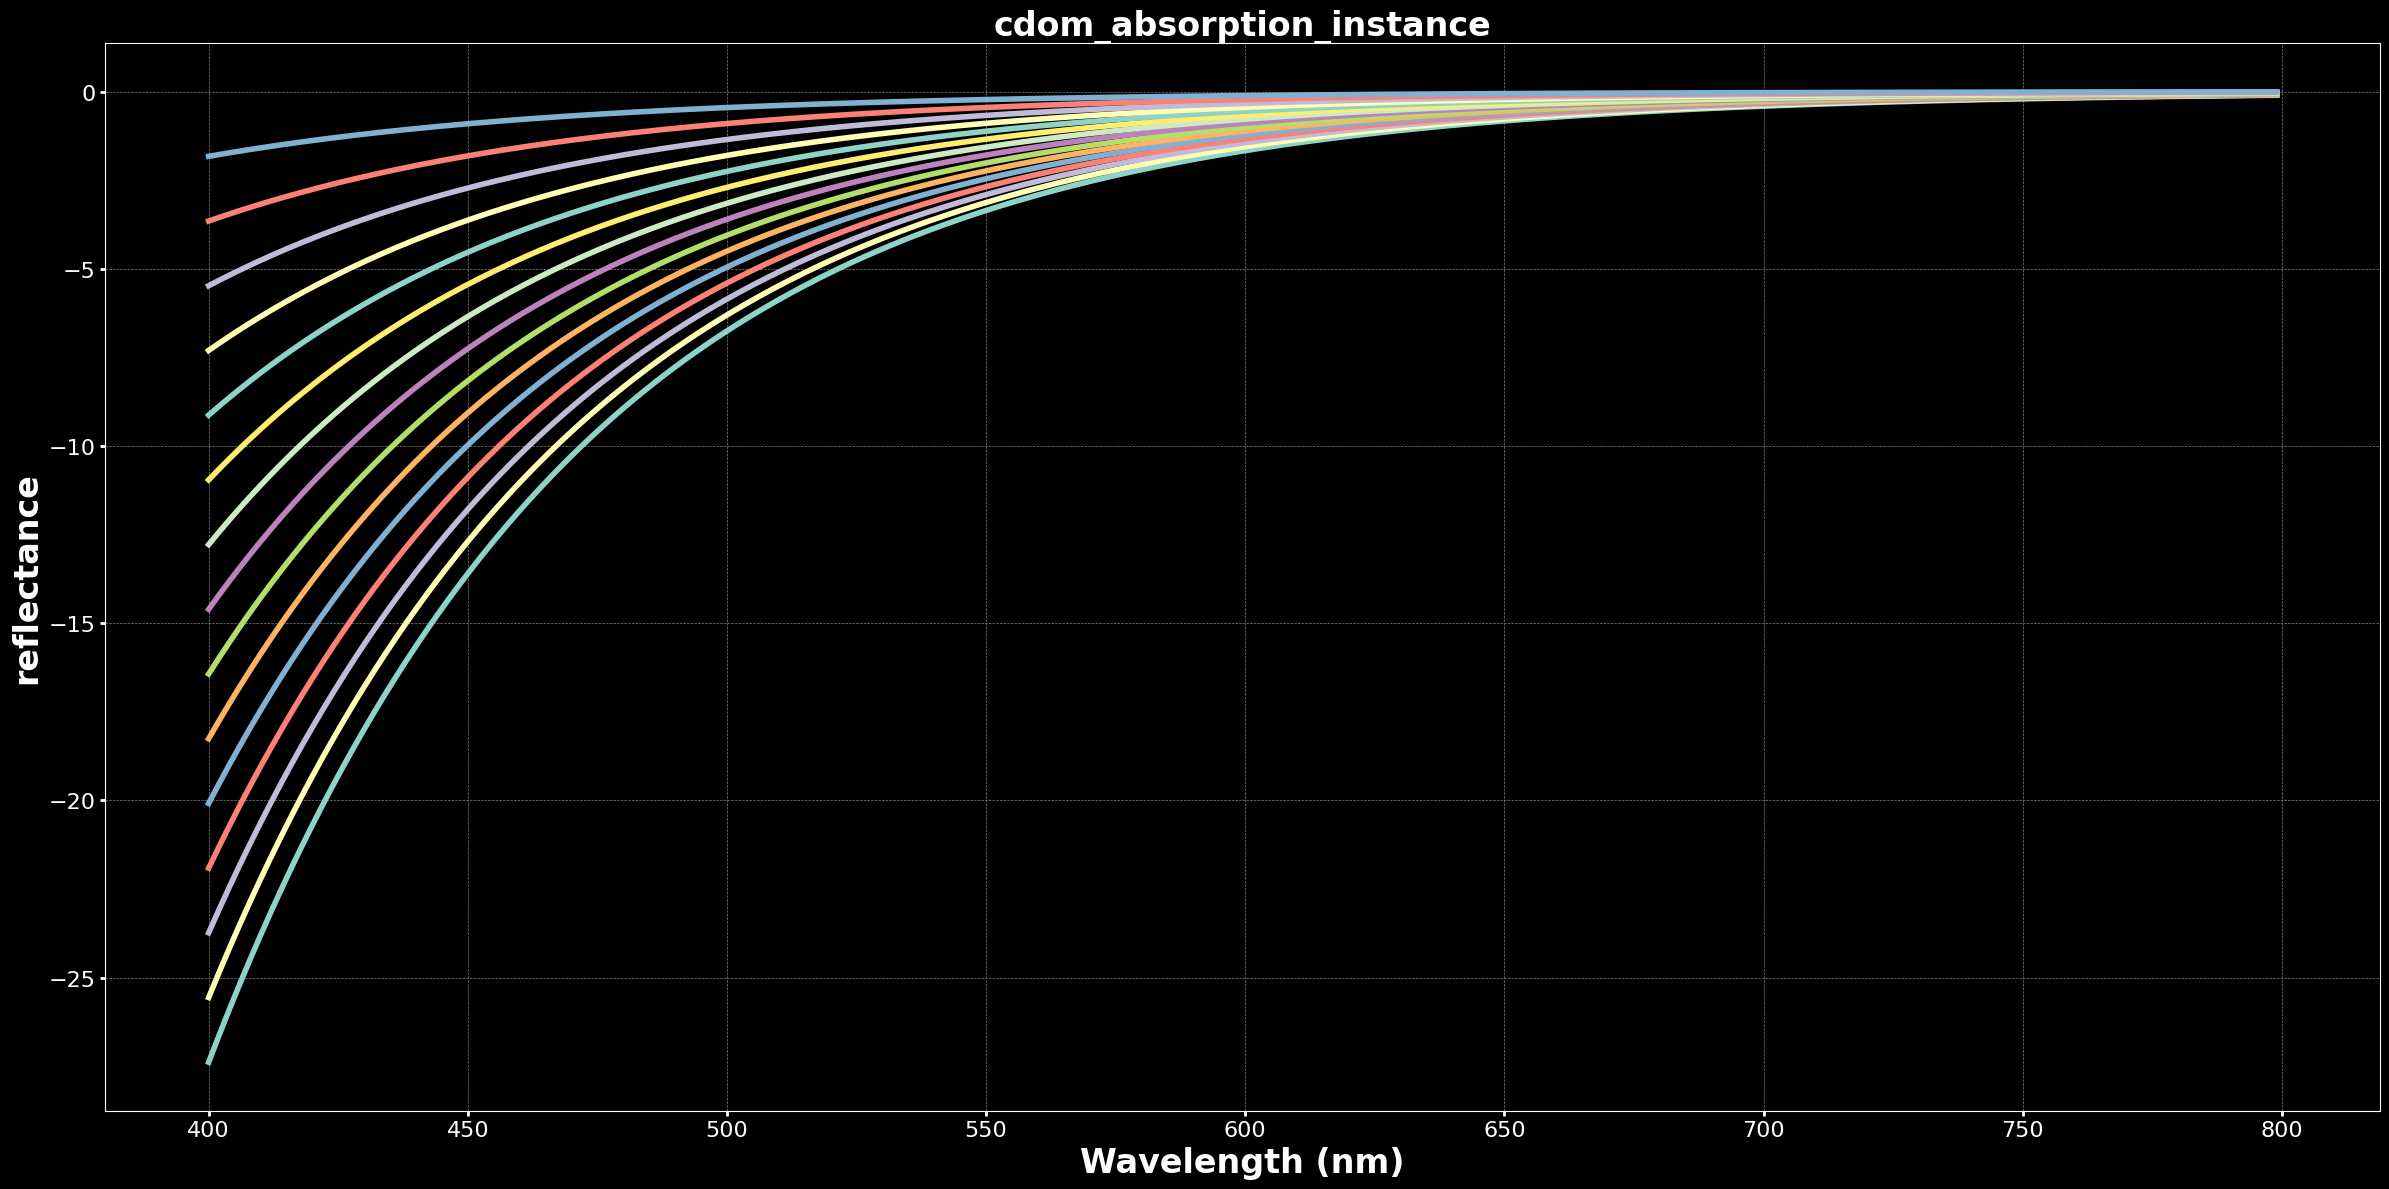

In [5]:
from sasha.model.water_iops.models.cdom import *


# Example usage of CdomAbsorptionModel
cdom_absorption_instance = CdomAbsorptionModel( wvl=wvl , backend=BACKEND)
abs_spec = cdom_absorption_instance.get_property(cdom=cdom)

spectra = np.array(abs_spec).T
plot_spectra(wvl, {"cdom_absorption_instance":spectra})
# Example usage of CdomBackscatteringModel
cdom_backscattering_instance = CdomBackscatteringModel(
    wvl=wvl, backend = BACKEND # Example wavelength array
)

In [6]:
%%timeit
cdom_absorption_instance.get_property(cdom=cdom)

30.2 μs ± 4.36 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


2025-03-25 17:20:43 - INFO - TsmAbsorptionModel - Initialized Tsm Absorption Model with model option: None
2025-03-25 17:20:43 - INFO - TsmBackscatteringModel - Initialized Tsm Backscattering Model with model option: log_bricaud


(<Figure size 2400x1200 with 1 Axes>,
 <Axes: title={'center': 'tsm_backscattering_instance'}, xlabel='Wavelength (nm)', ylabel='reflectance'>)

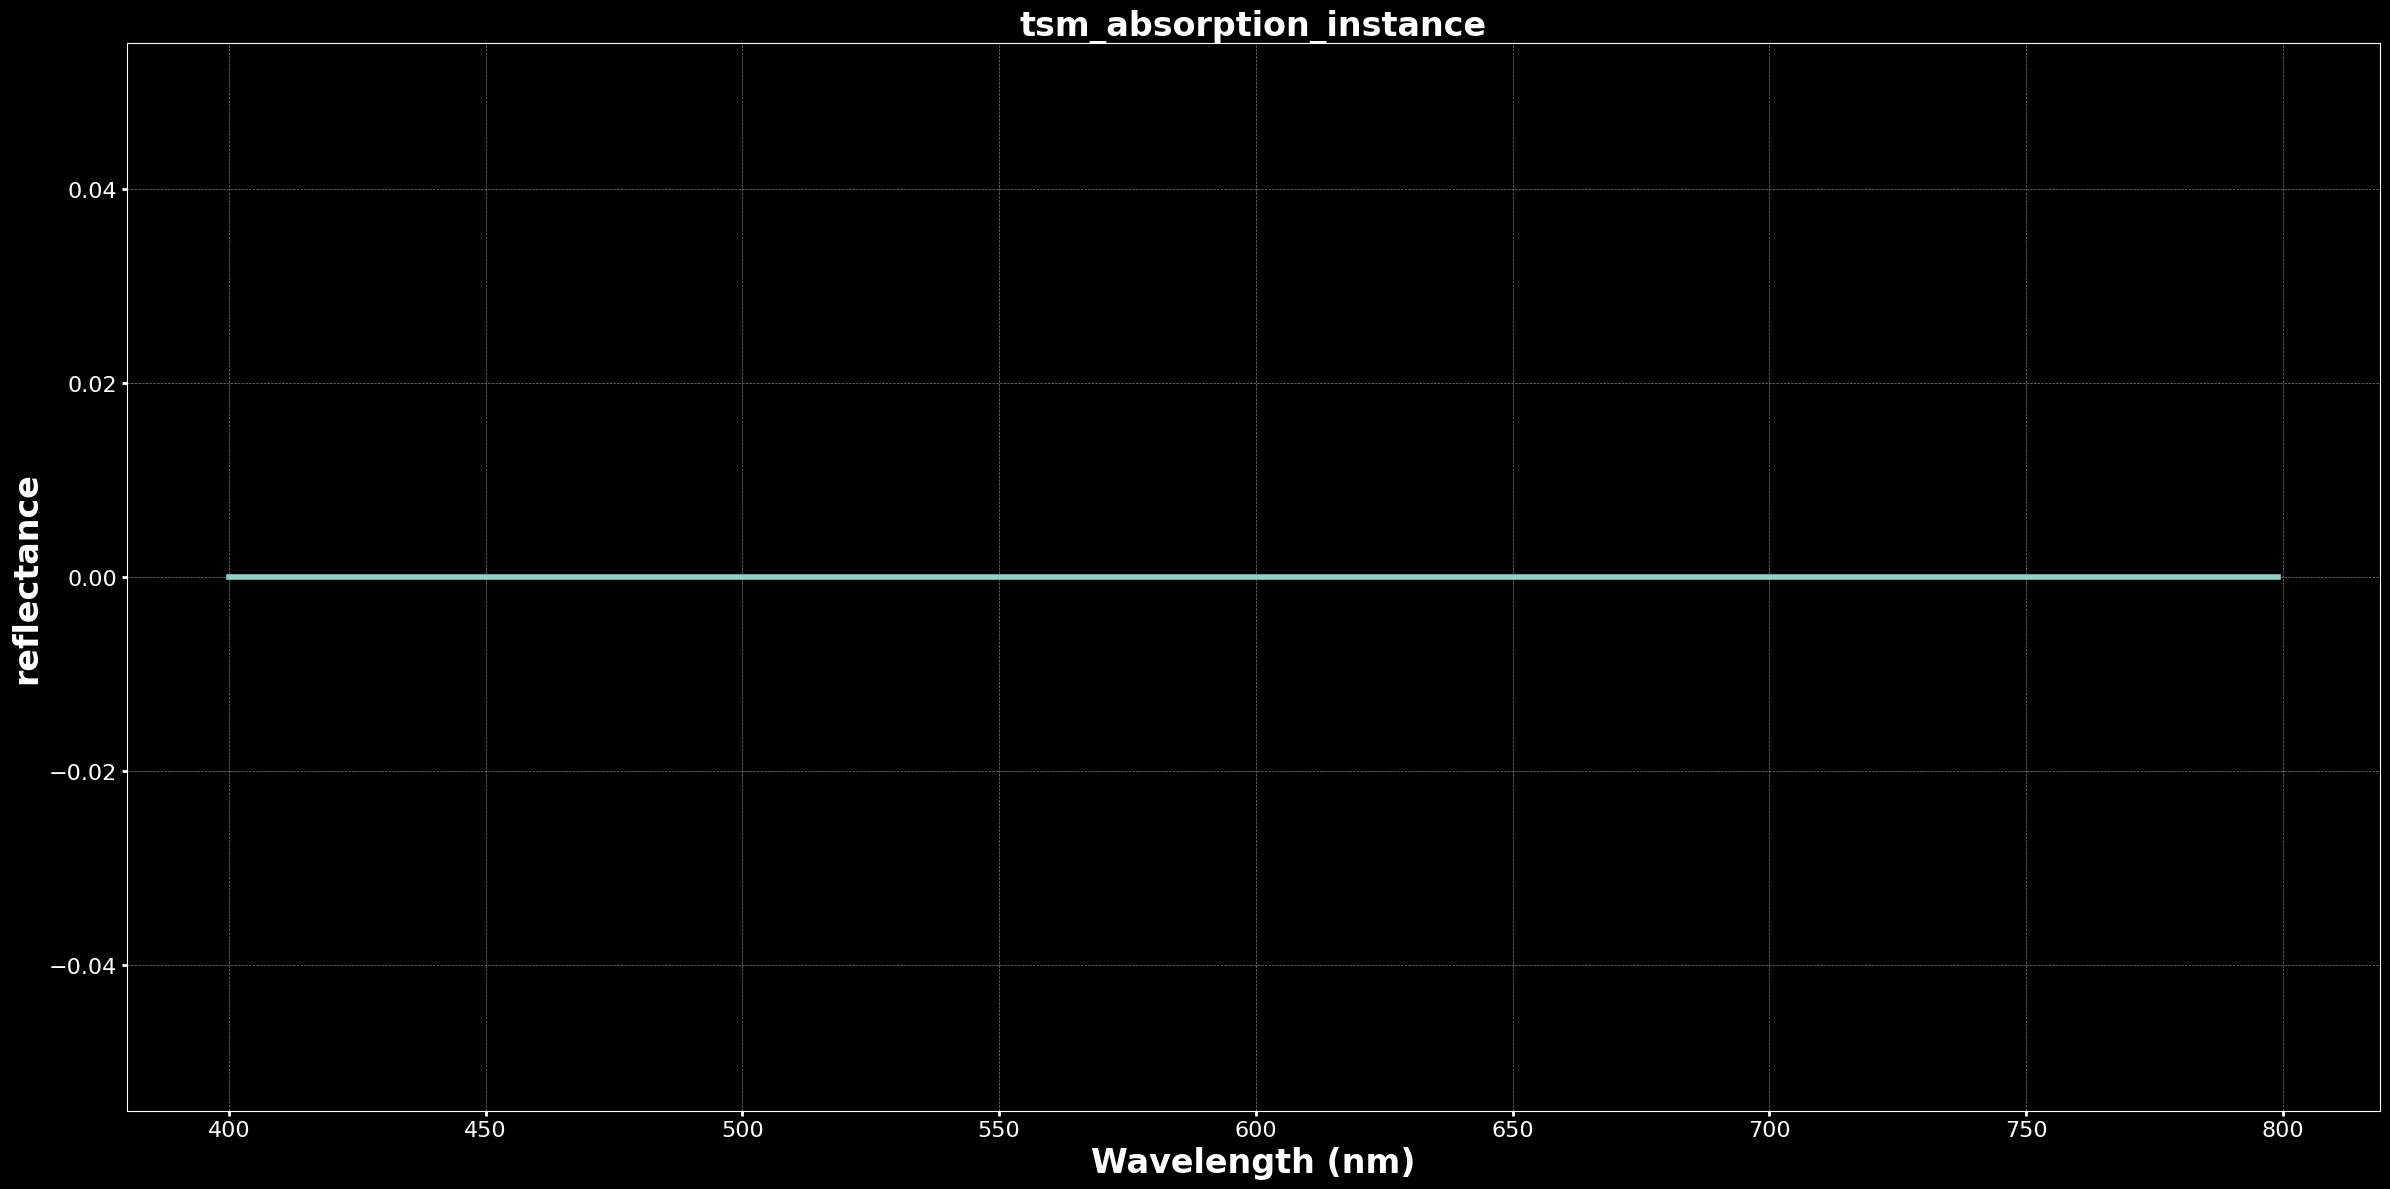

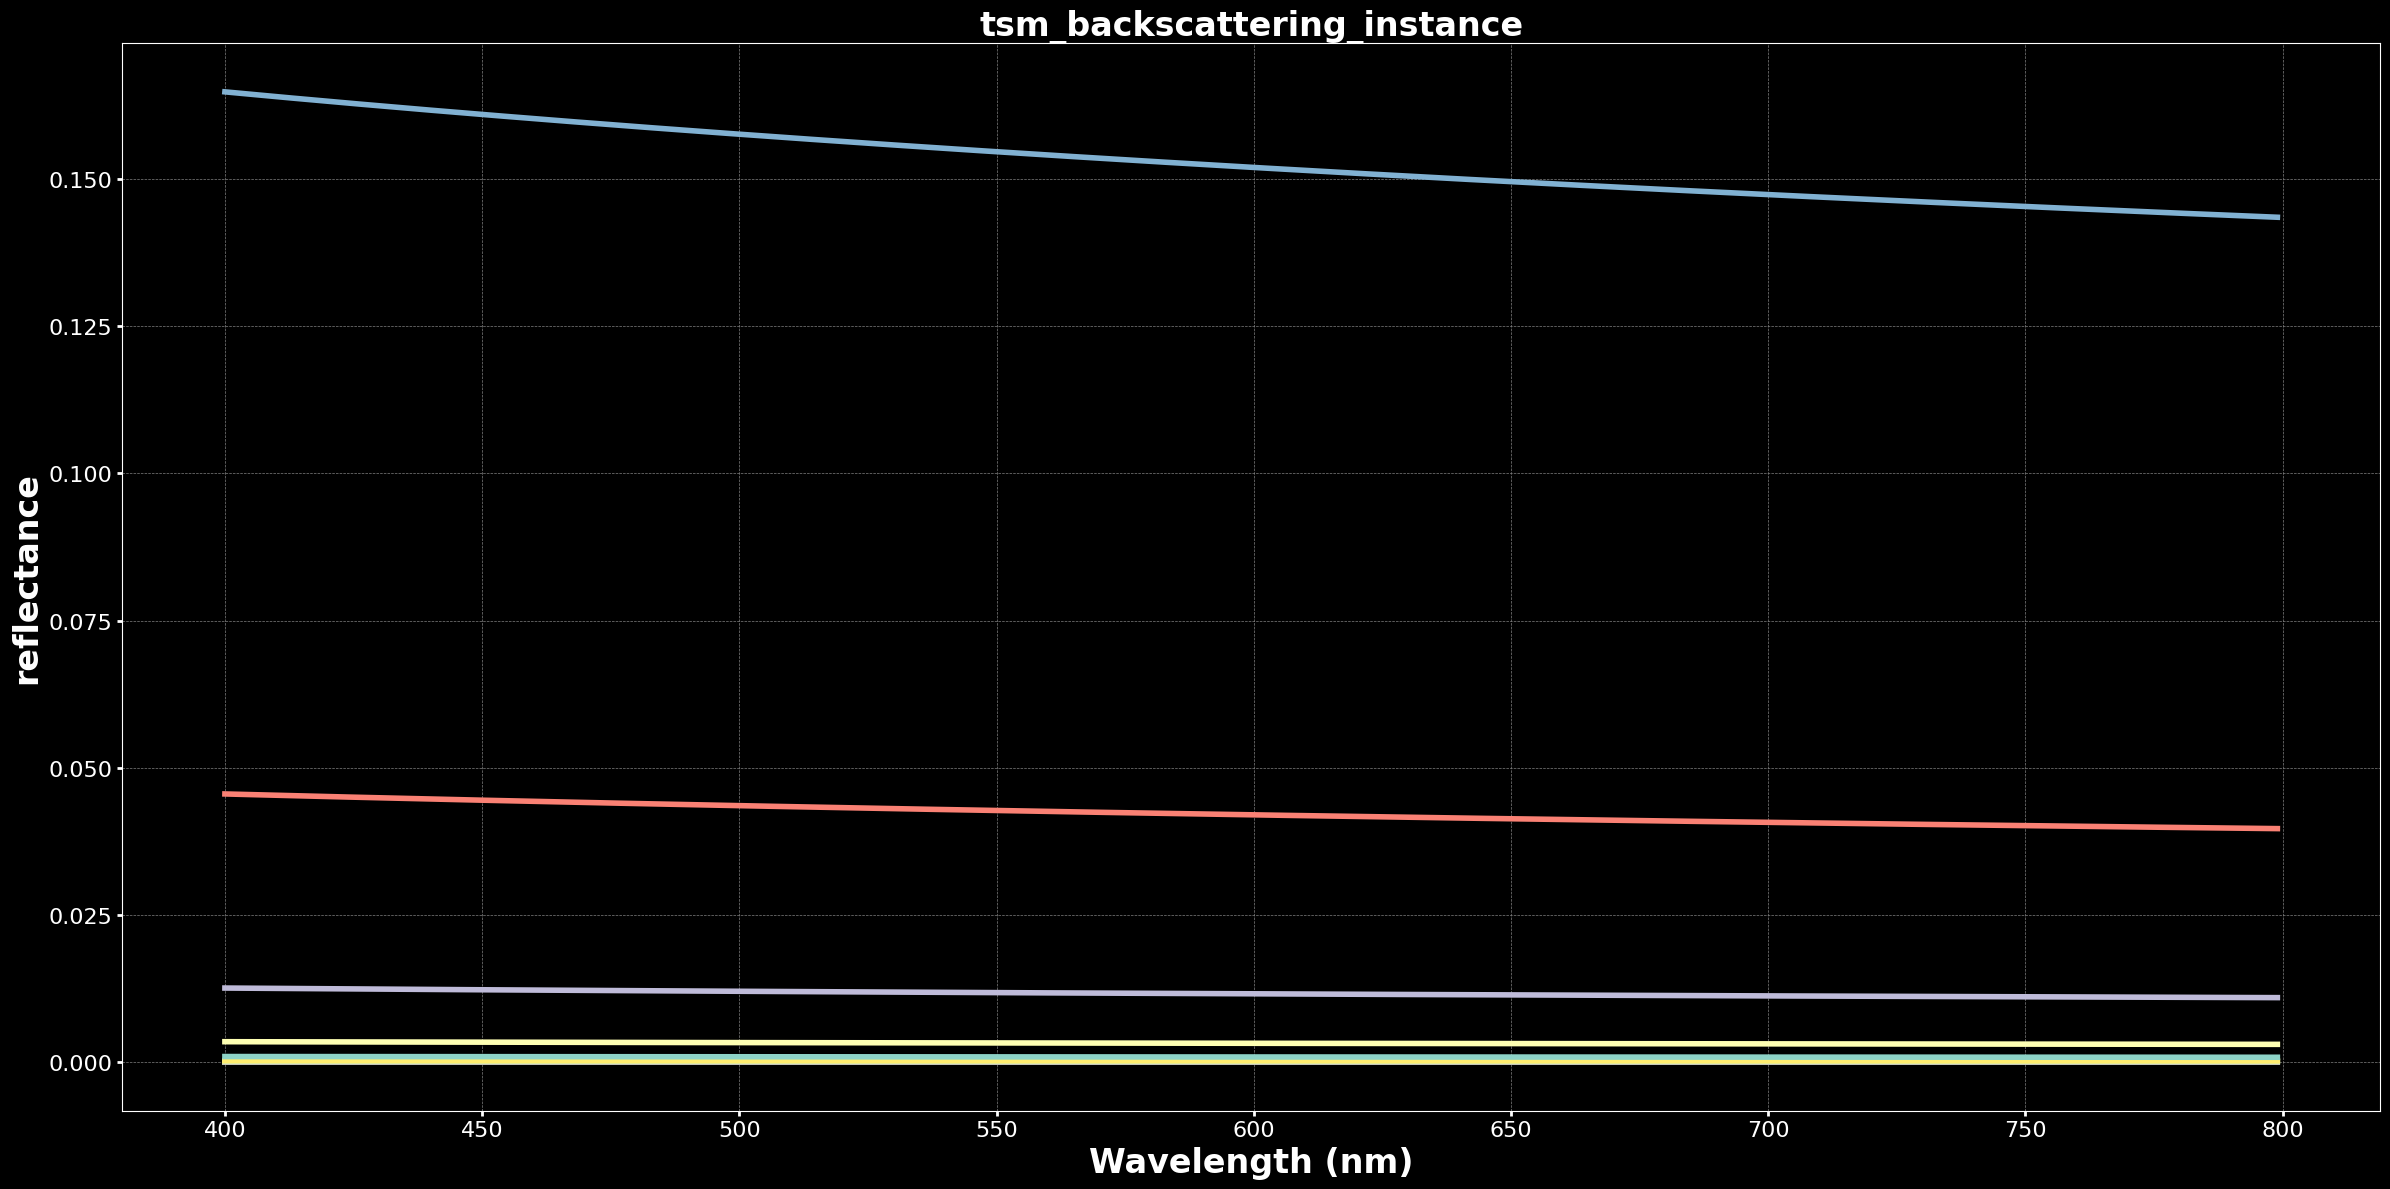

In [7]:
# Example usage of TsmAbsorptionModel
from sasha.model.water_iops.models.tsm import *


MODEL_OPTION_ABS = "None"
MODEL_OPTION_BS = "log_bricaud"


tsm_absorption_instance = TsmAbsorptionModel(
    wvl=wvl,  # Example wavelength array
    model_option= MODEL_OPTION_ABS, 
    backend = BACKEND)

tsm            =    convert_array(np.linspace(-15.0,3.0,N_SPECTRA),BACKEND)


spectra = np.array(tsm_absorption_instance.get_property(tsm=tsm)).T
plot_spectra(wvl, {"tsm_absorption_instance":spectra})

# Example usage of TsmBackscatteringModel
tsm_backscattering_instance = TsmBackscatteringModel(
    wvl=wvl, 
    model_option=MODEL_OPTION_BS, backend = BACKEND
)
spectra = np.array(tsm_backscattering_instance.get_property(tsm=tsm)).T

plot_spectra(wvl, {"tsm_backscattering_instance":spectra})



In [8]:
%%timeit
res = tsm_backscattering_instance.get_property(tsm=tsm)

46.7 μs ± 5.72 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


2025-03-25 17:20:48 - INFO - WaterPure - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\awater.txt
2025-03-25 17:20:48 - INFO - WaterPure - Initialized Pure Water Model


(<Figure size 2400x1200 with 1 Axes>,
 <Axes: title={'center': 'water'}, xlabel='Wavelength (nm)', ylabel='reflectance'>)

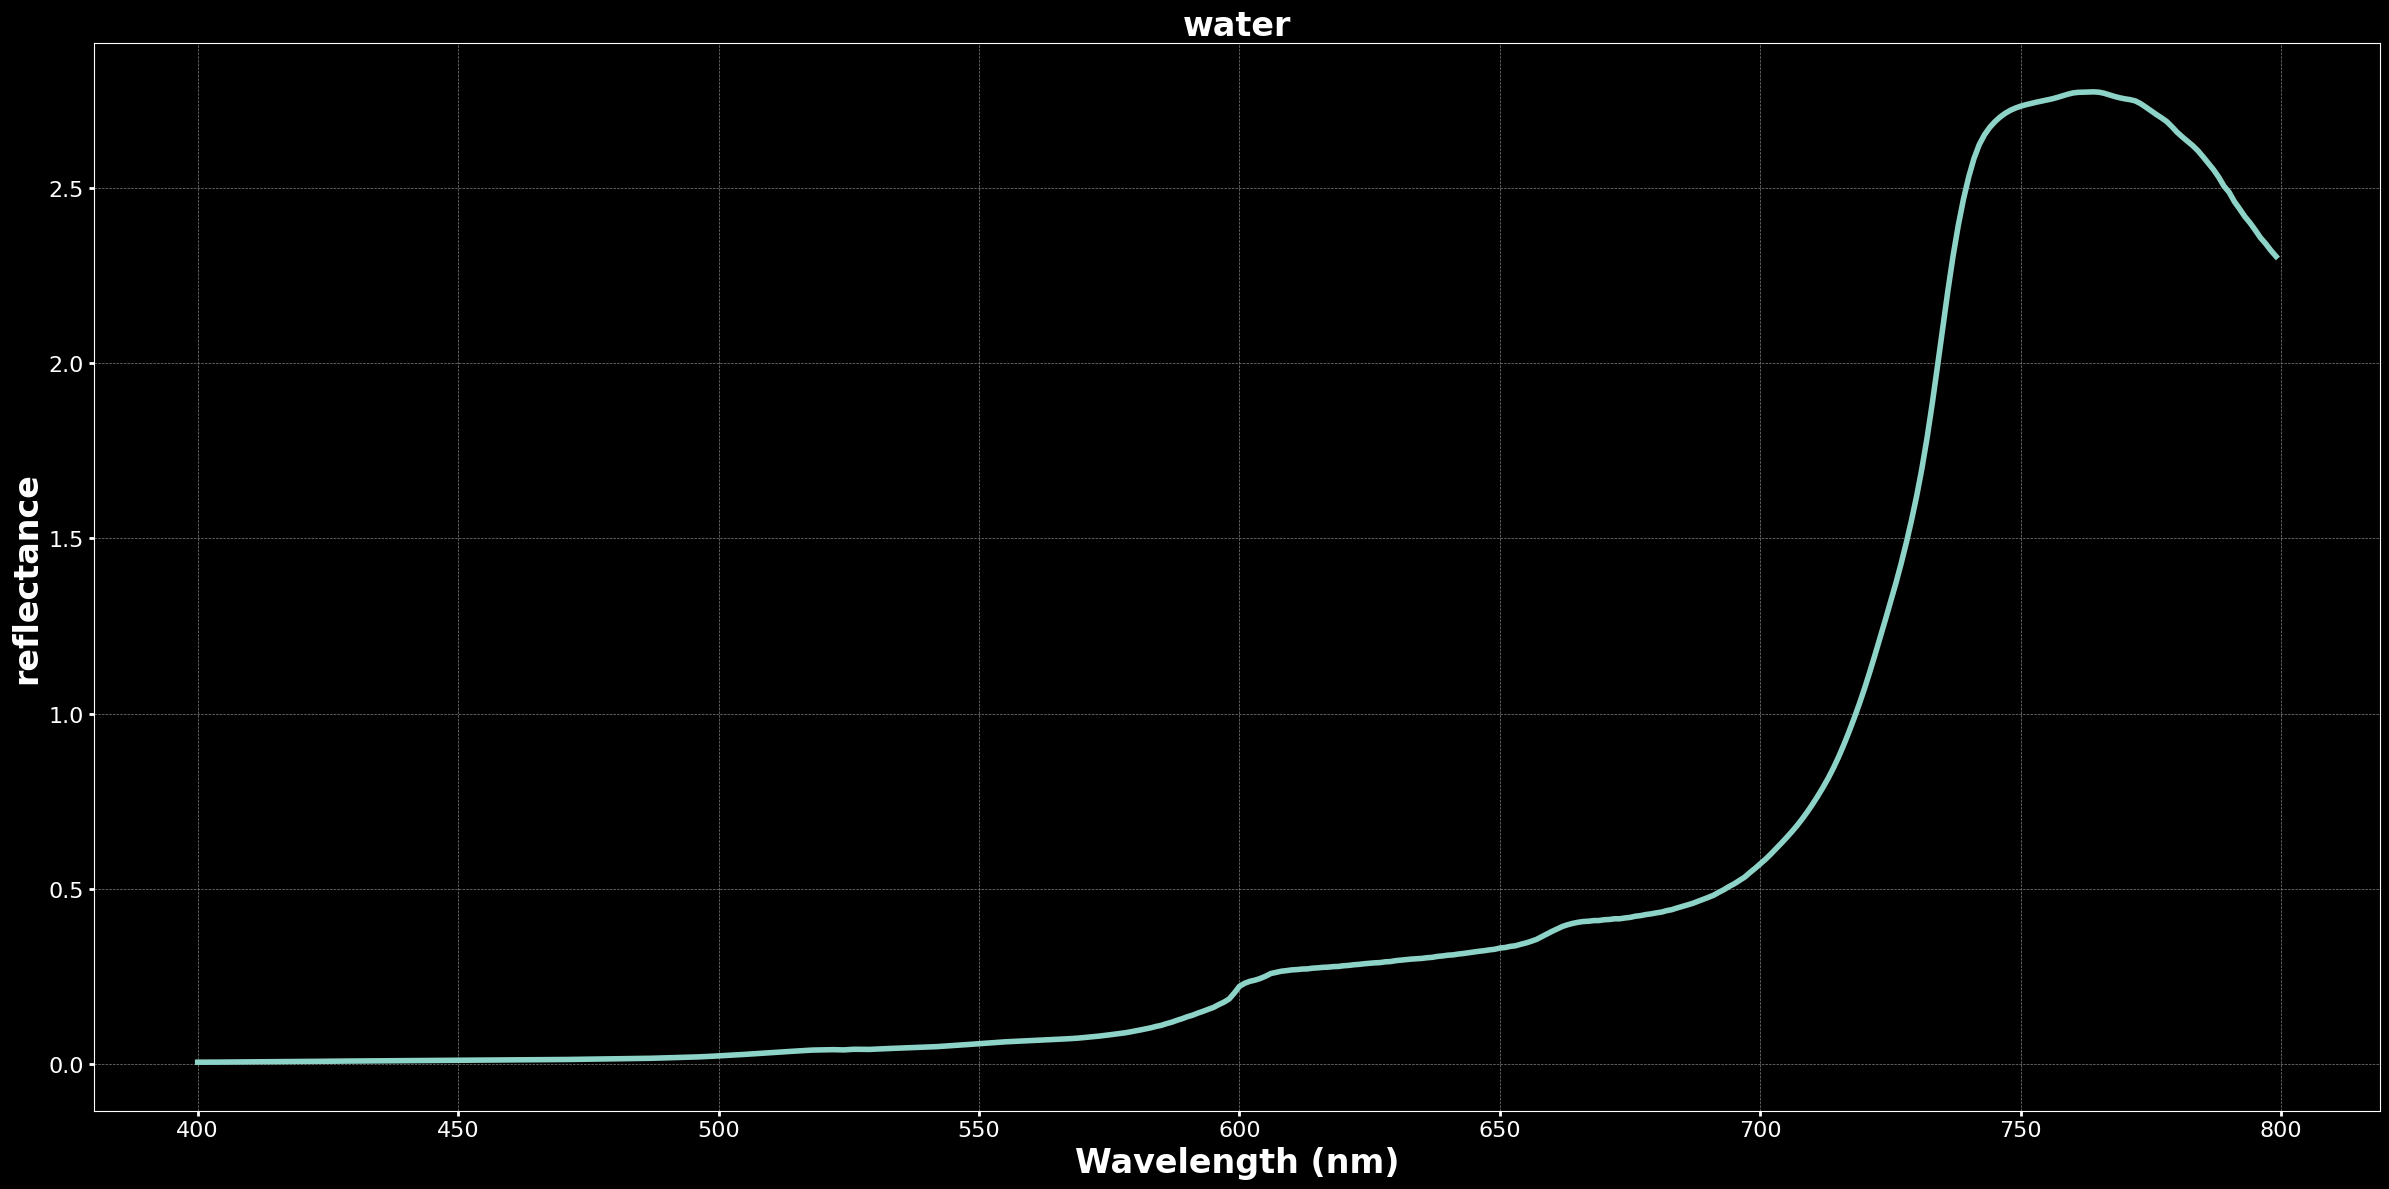

In [9]:
from sasha.model.water_iops.models.pure import WaterPure
wp = WaterPure(wvl=wvl, backend = BACKEND)
plot_spectra(wvl, {"water":wp.awater})

2025-03-25 17:20:48 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\aphys2.txt
2025-03-25 17:20:48 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\ephys2.txt


2025-03-25 17:20:48 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_micro.txt
2025-03-25 17:20:48 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_nano.txt
2025-03-25 17:20:49 - INFO - ChlAbsorptionModel - Initialized Chl Absorption Model with model option: log_bricaud
2025-03-25 17:20:49 - INFO - ChlBackscatteringModel - Initialized Chl Backscattering Model with model option: log_bricaud


(<Figure size 2400x1200 with 1 Axes>,
 <Axes: title={'center': 'chl_backscattering_instance'}, xlabel='Wavelength (nm)', ylabel='reflectance'>)

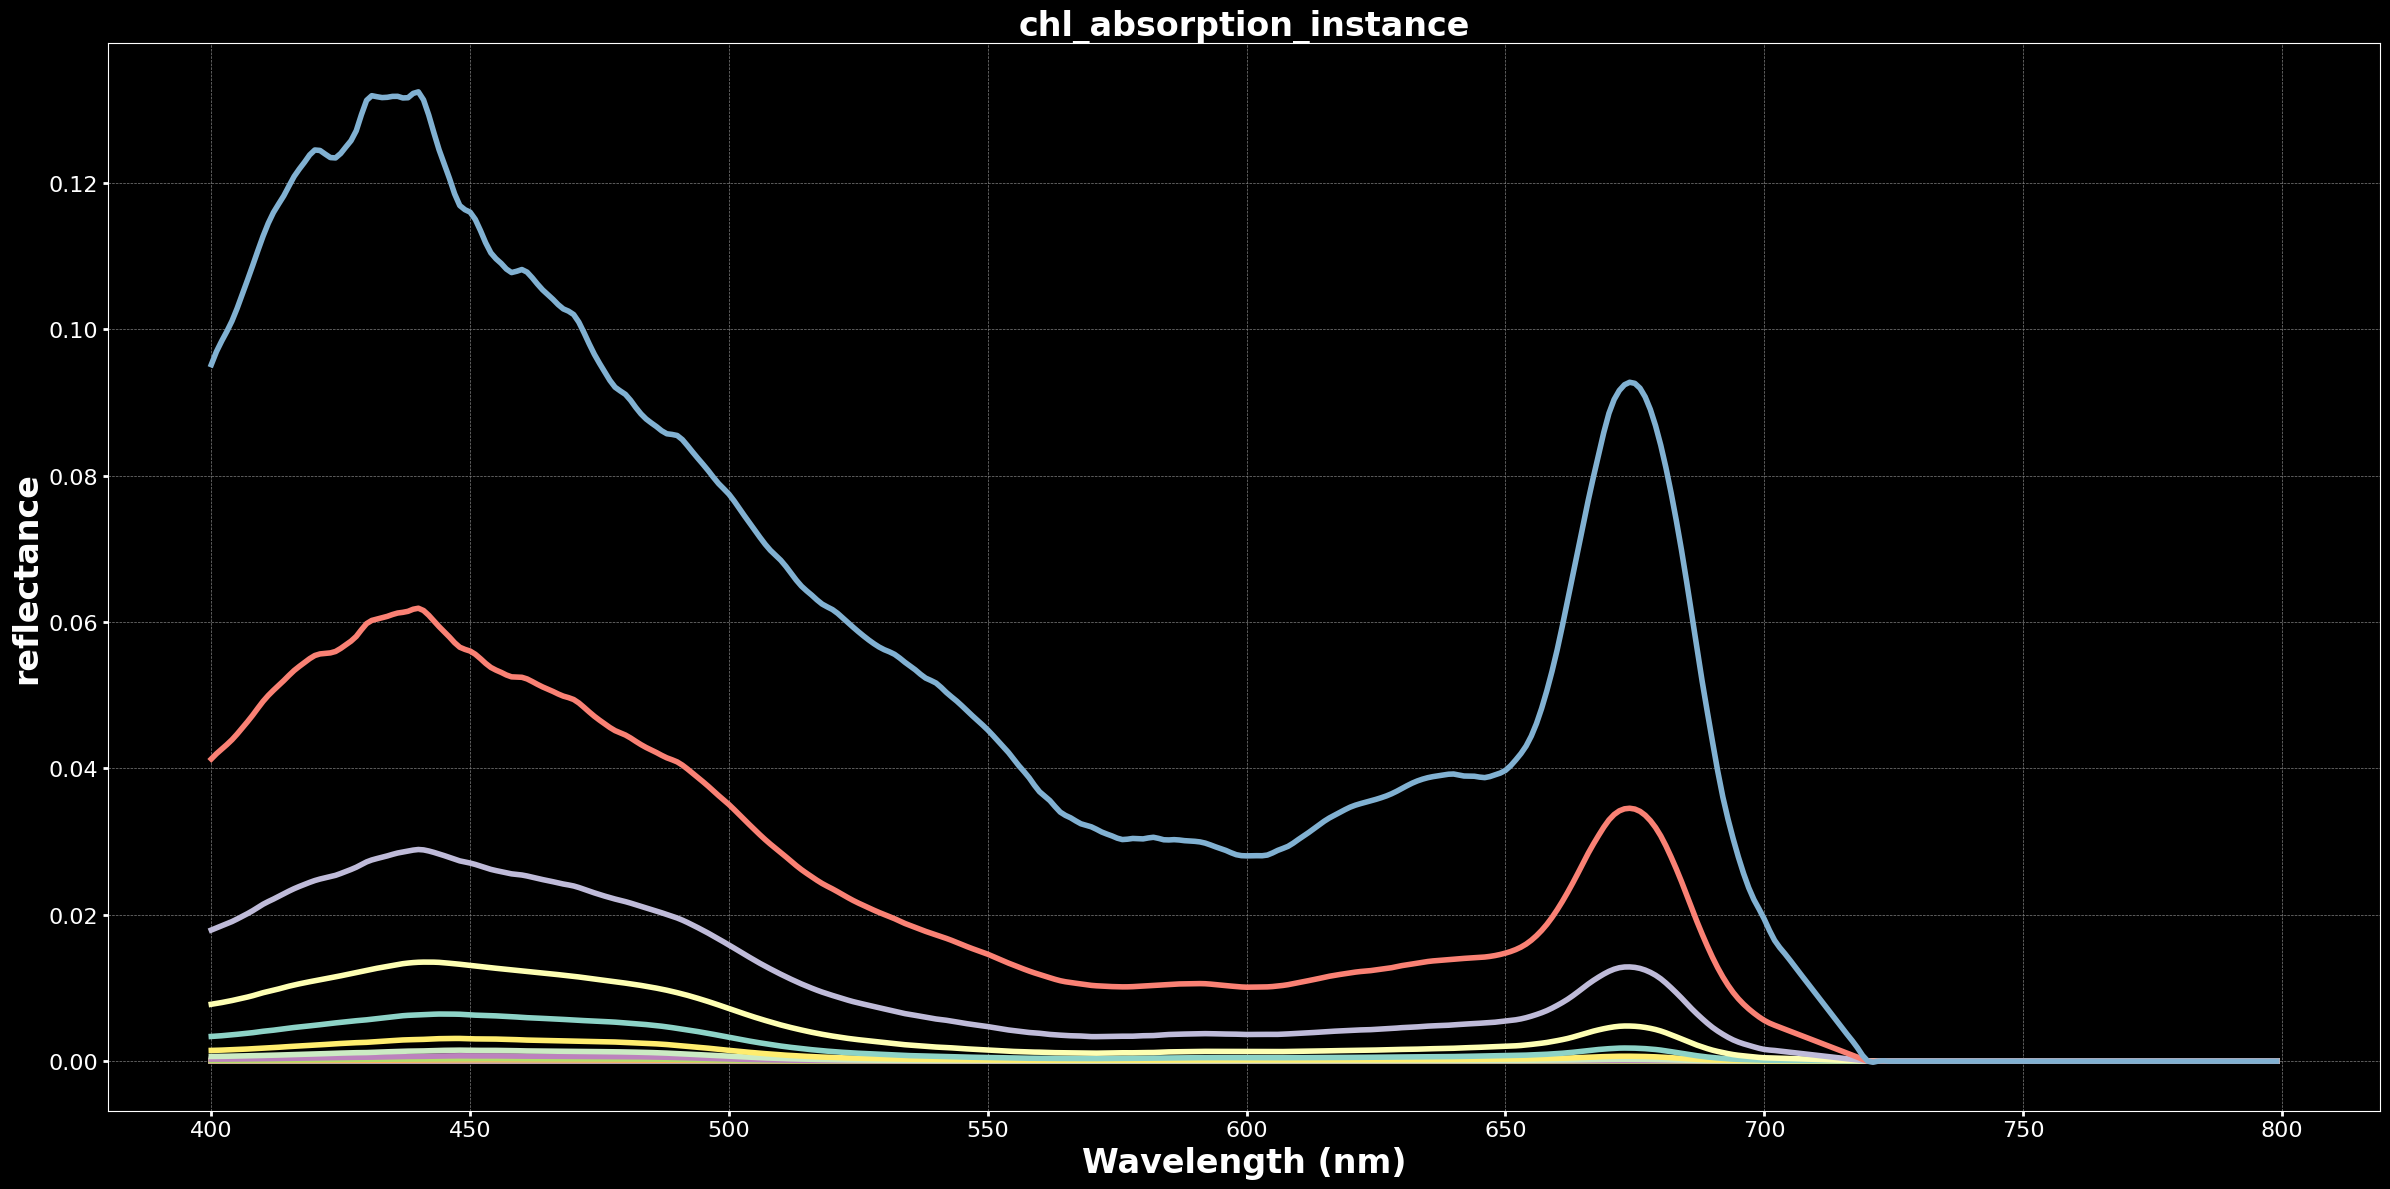

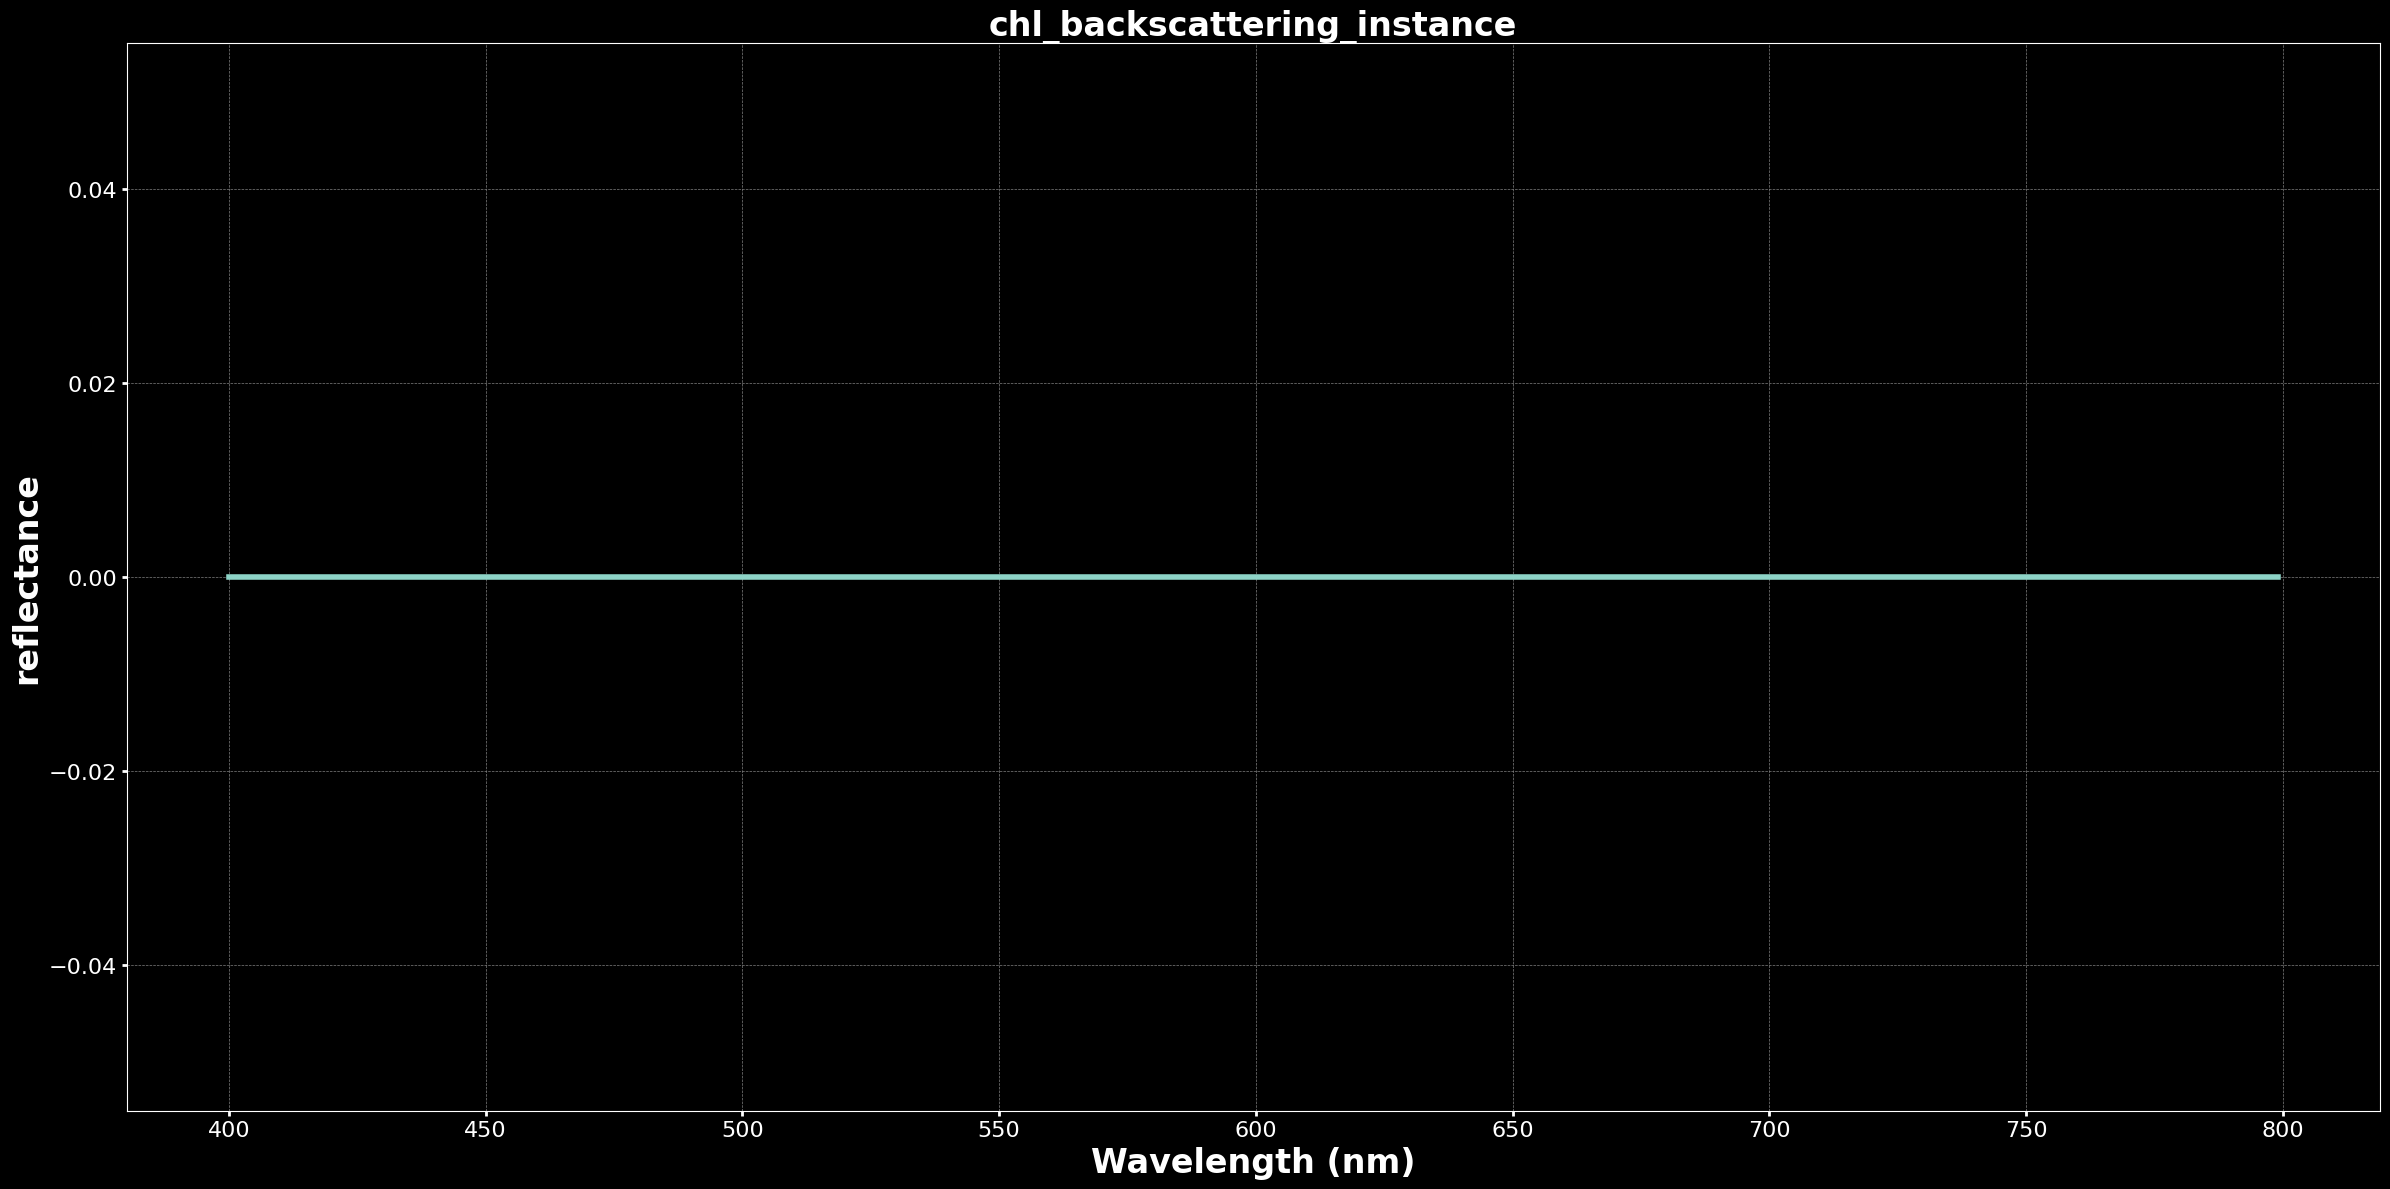

In [10]:
# Example usage of ChlAbsorptionModel
from sasha.model.water_iops.models.chl import *


MODEL_OPTION_ABS =  "log_bricaud"
chl              =    convert_array(np.linspace(-15.0,2.0,N_SPECTRA),BACKEND)

chl_absorption_instance = ChlAbsorptionModel(
    wvl=wvl,  
    model_option=MODEL_OPTION_ABS, backend = Backend.JAX)
abs_spec = chl_absorption_instance.get_property(chl=chl)
spectra = np.array(abs_spec).T
plot_spectra(wvl, {"chl_absorption_instance":spectra})


# Example usage of ChlBackscatteringModel
# ChlBackscatteringModel
MODEL_OPTION_BACKSCATTERING = "log_bricaud"

chl_backscattering_instance = ChlBackscatteringModel(
    wvl=wvl,  
    model_option=MODEL_OPTION_BACKSCATTERING, backend = Backend.JAX)

bb_pec  = chl_backscattering_instance.get_property(chl=chl)
spectra = np.array(bb_pec).T

plot_spectra(wvl, {"chl_backscattering_instance":spectra})

In [11]:
%%timeit
res = chl_absorption_instance.get_property(chl=chl)

170 μs ± 20.7 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


2025-03-25 17:21:04 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\aphys2.txt


2025-03-25 17:21:04 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\ephys2.txt
2025-03-25 17:21:04 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_micro.txt
2025-03-25 17:21:04 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_nano.txt
2025-03-25 17:21:04 - INFO - ChlAbsorptionModel - Initialized Chl Absorption Model with model option: log_bricaud
2025-03-25 17:21:04 - INFO - CdomAbsorptionModel - Initialized Cdom Absorption Model with model option: log_bricaud
2025-03-25 17:21:04 - INFO - TsmAbsorptionModel - Initialized Tsm Absorption Model with model option: log_bricaud
2025-03-25 17:21:04 - INFO - ChlBackscatteringModel - Initialized Chl Backscattering Model with model option: log_bricaud
2025-03-25 17:21:04 - INFO - CdomBackscatteringModel -

(<Figure size 2400x1200 with 1 Axes>,
 <Axes: title={'center': 'Attenuation'}, xlabel='Wavelength (nm)', ylabel='reflectance'>)

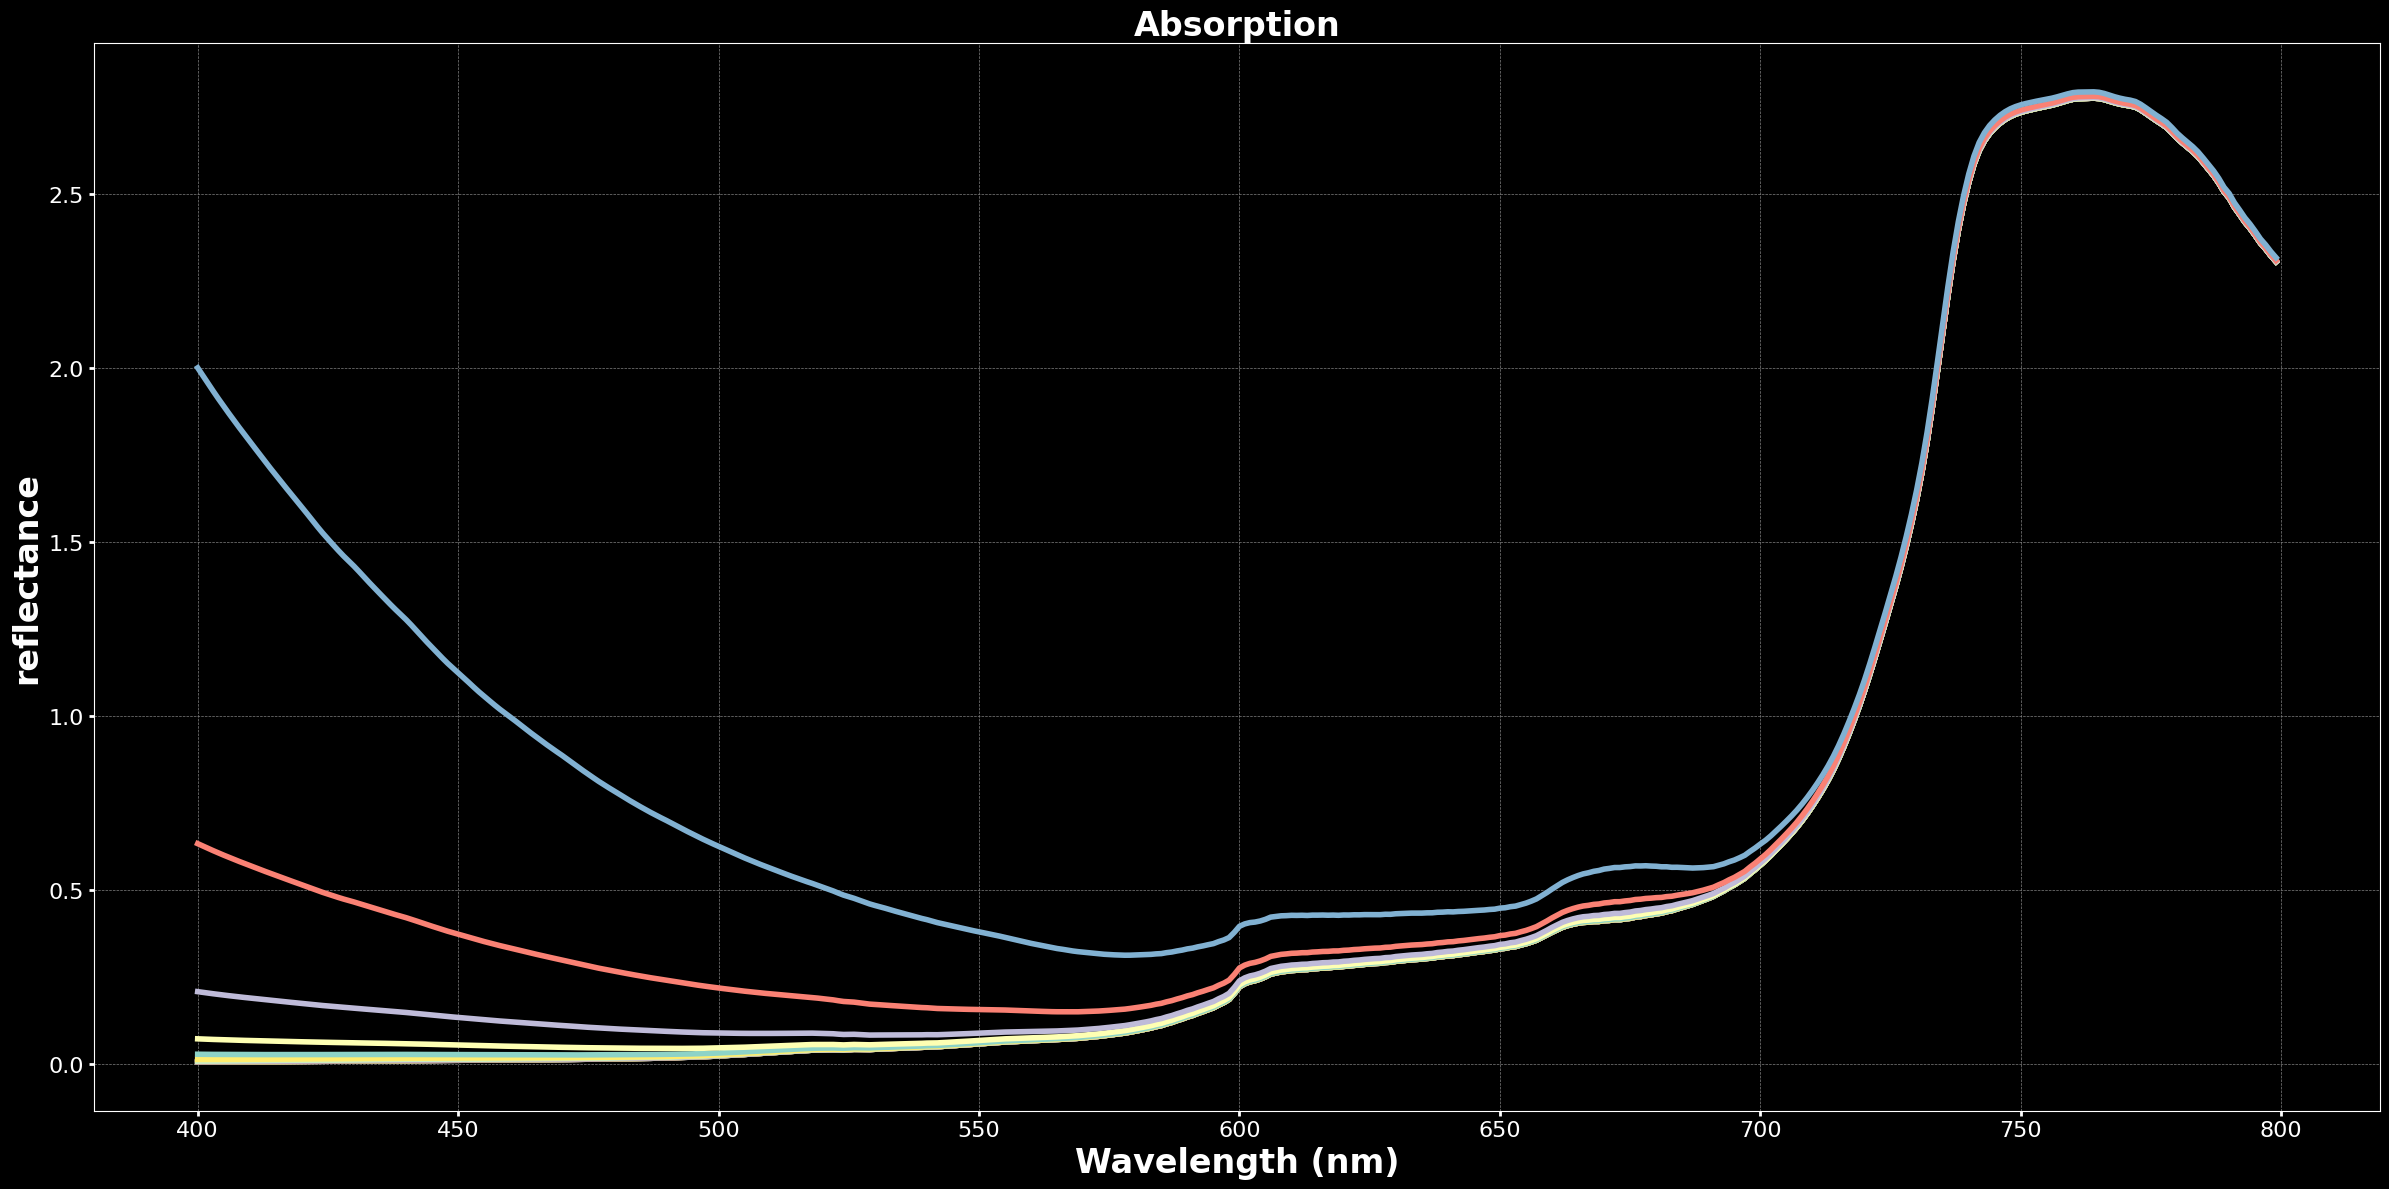

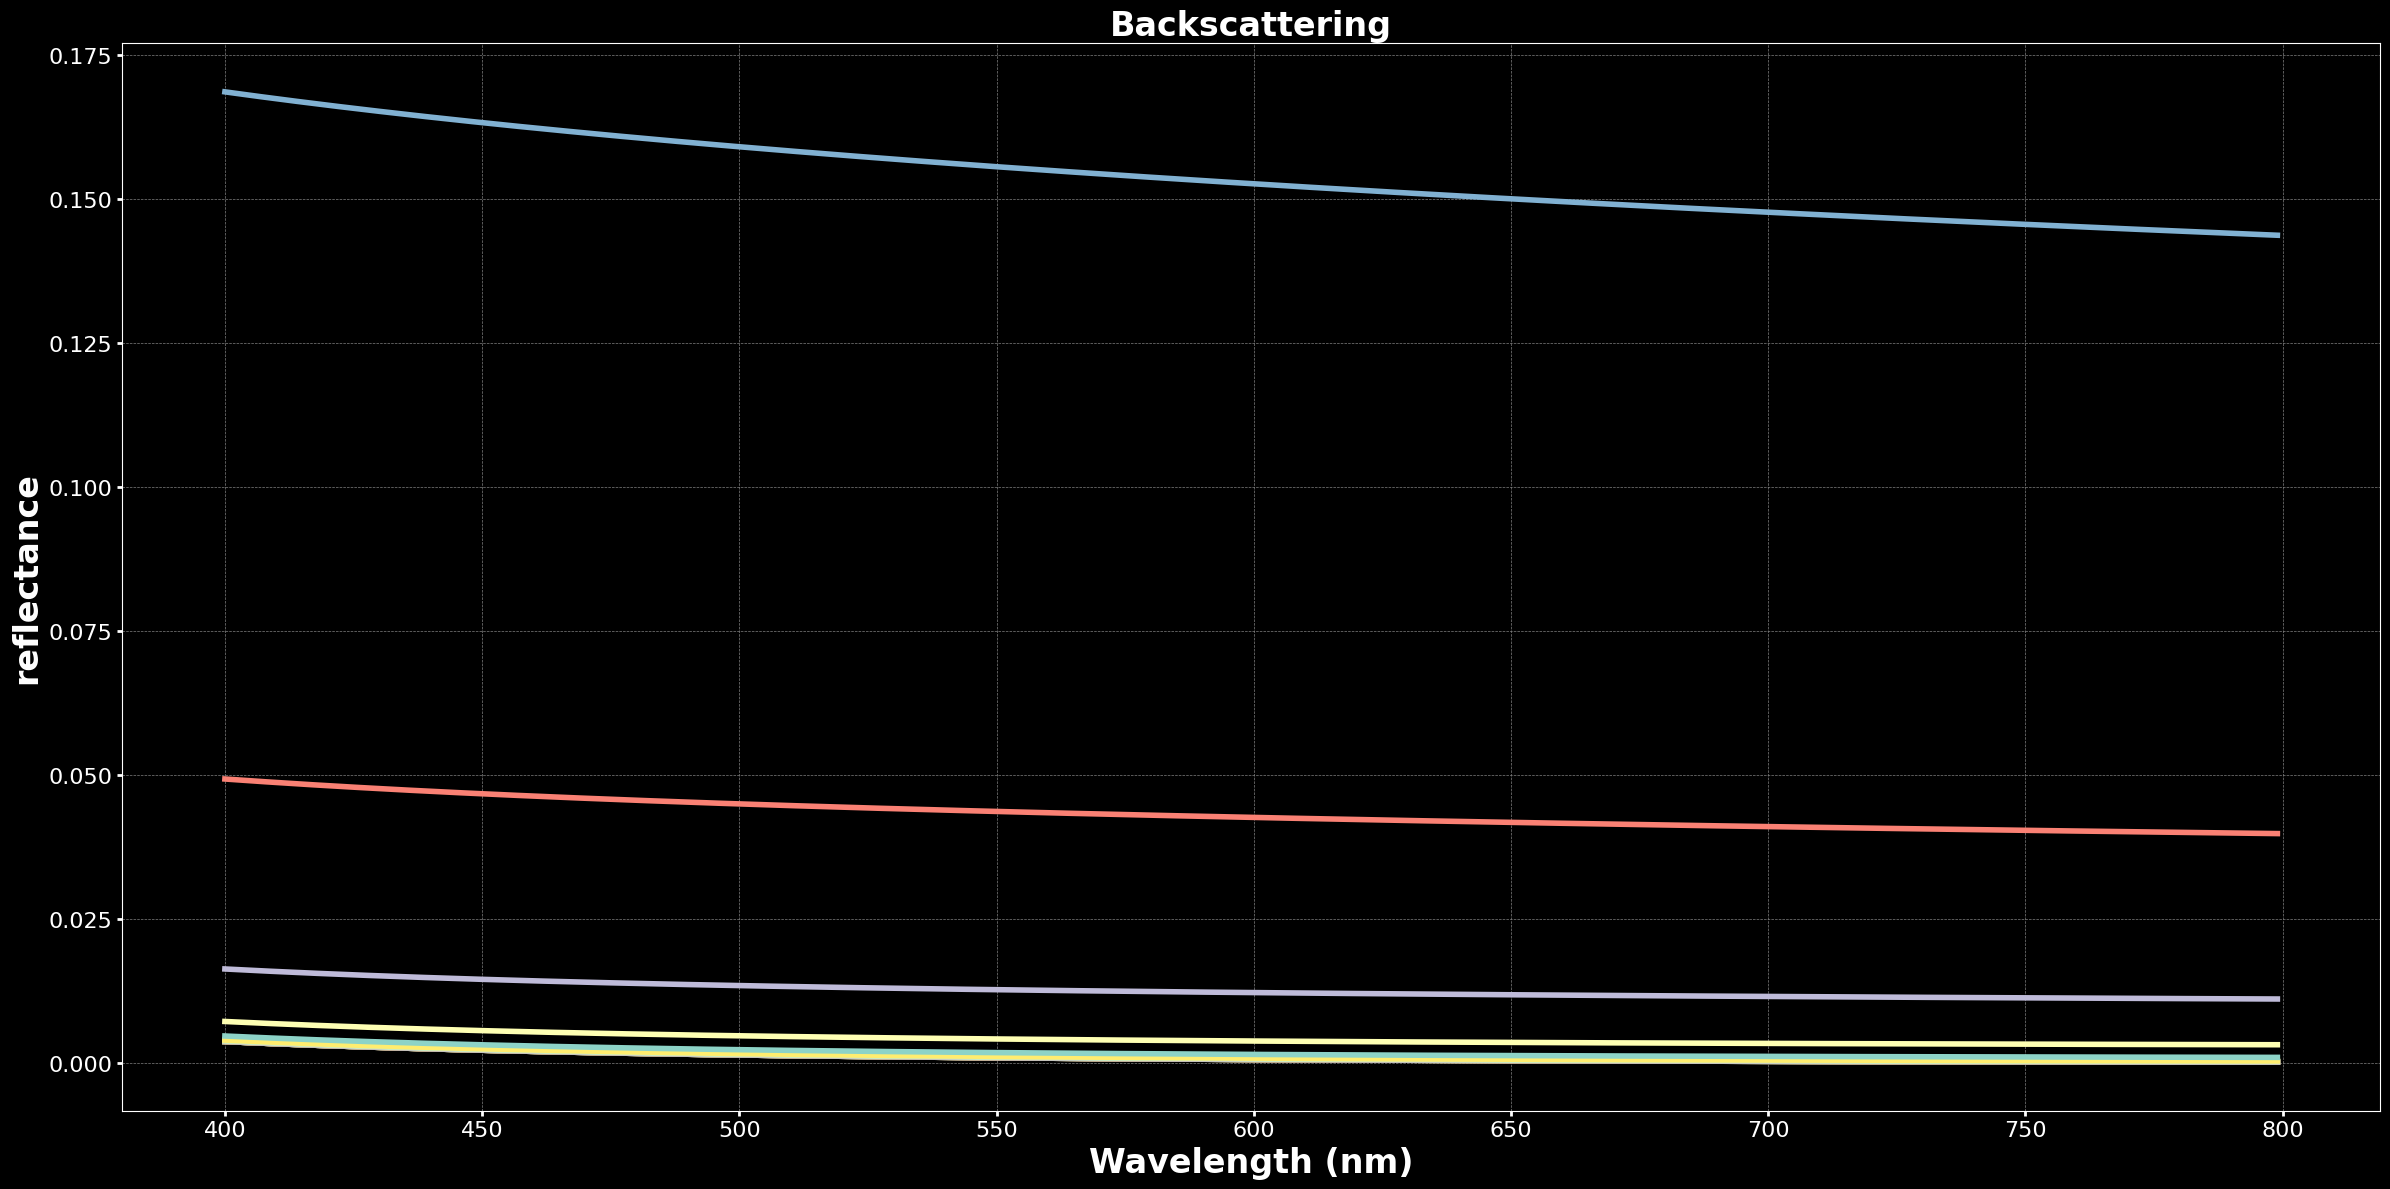

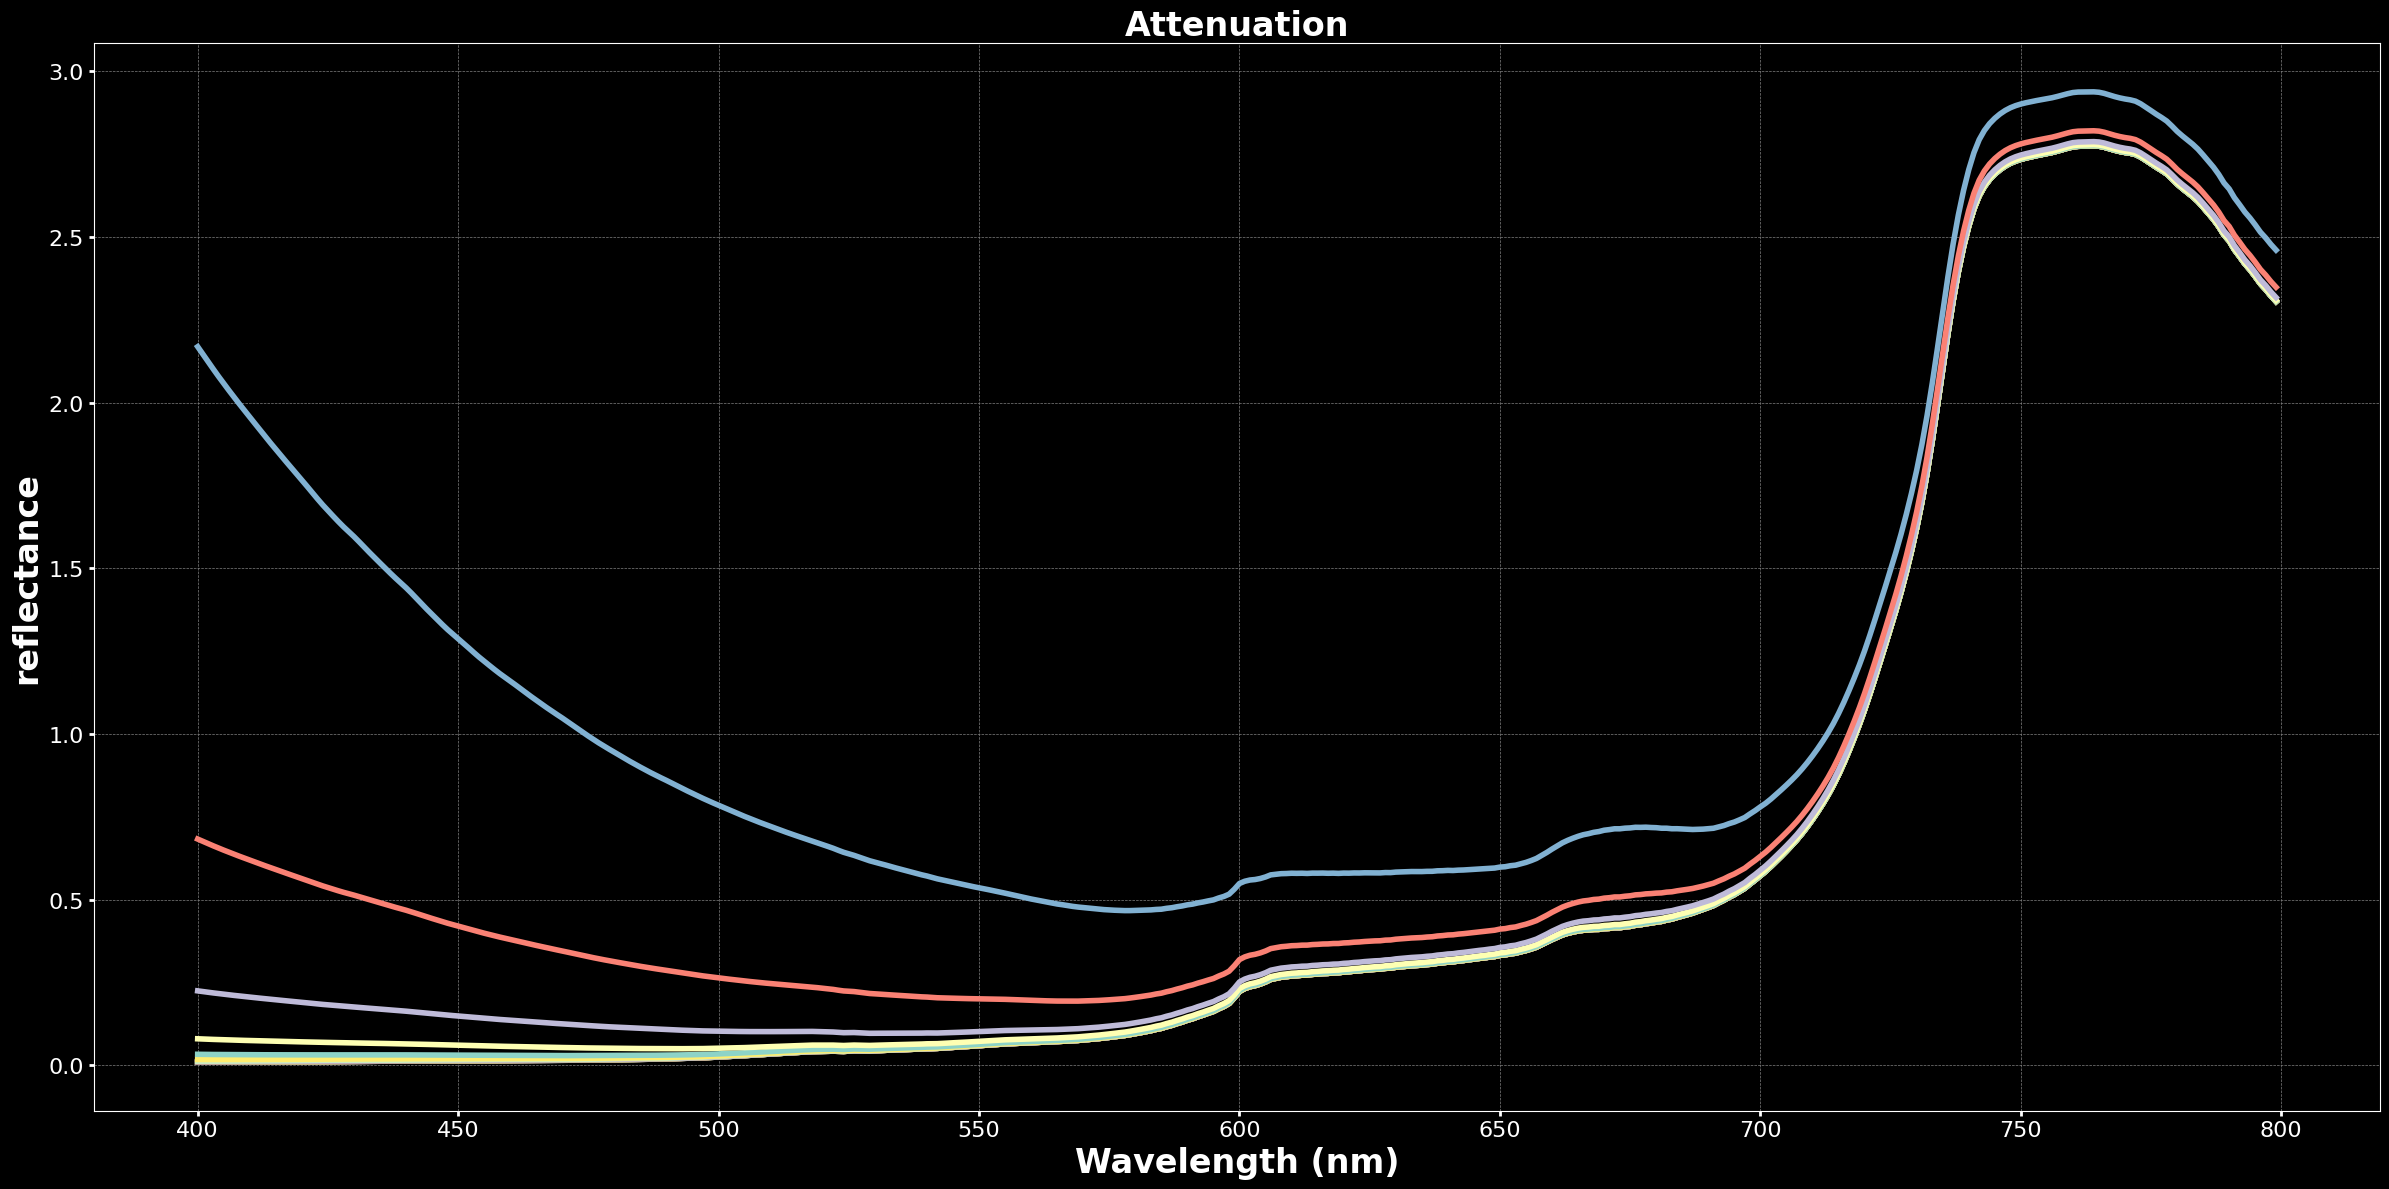

In [12]:
from sasha.model.water_iops.models.iops import *

# Example usage and testing of WaterIOPs
water_iops_instance = WaterIOPs(
    wvl=wvl,
    aphy_model_option="log_bricaud",
    acdom_model_option="log_bricaud",
    anap_model_option="log_bricaud",
    bb_chl_model_option="log_bricaud",
    bb_cdom_model_option="log_bricaud",
    bb_tsm_model_option="log_bricaud", backend = BACKEND
)
# Test absorption properties
a_props = np.array(water_iops_instance.get_property(prop_type="a", chl=chl, cdom=cdom, tsm=tsm))

plot_spectra(wvl, {"Absorption": a_props.T})
# Test backscattering properties
bb_props =np.array( water_iops_instance.get_property(prop_type="bb", chl=chl, cdom=cdom, tsm=tsm))
plot_spectra(wvl, {"Backscattering": bb_props.T})

# Test attenuation properties
k_props = np.array(water_iops_instance.get_property(prop_type="k", chl=chl, cdom=cdom, tsm=tsm))
# Plot the absorption spectra
plot_spectra(wvl, {"Attenuation": k_props.T})



In [13]:
%%timeit
res = water_iops_instance.get_property(prop_type="k", chl=chl, cdom=cdom, tsm=tsm)

752 μs ± 153 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


2025-03-25 17:21:11 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\aphys2.txt
2025-03-25 17:21:11 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\ephys2.txt
2025-03-25 17:21:11 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_micro.txt
2025-03-25 17:21:11 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_nano.txt
2025-03-25 17:21:11 - INFO - ChlAbsorptionModel - Initialized Chl Absorption Model with model option: log_bricaud
2025-03-25 17:21:11 - INFO - CdomAbsorptionModel - Initialized Cdom Absorption Model with model option: log_bricaud
2025-03-25 17:21:11 - INFO - TsmAbsorptionModel - Initialized Tsm Absorption Model with model option: log_bricaud
2025-03-25 17:21:11 -

(<Figure size 2400x1200 with 1 Axes>,
 <Axes: title={'center': 'RRSDP Properties'}, xlabel='Wavelength (nm)', ylabel='reflectance'>)

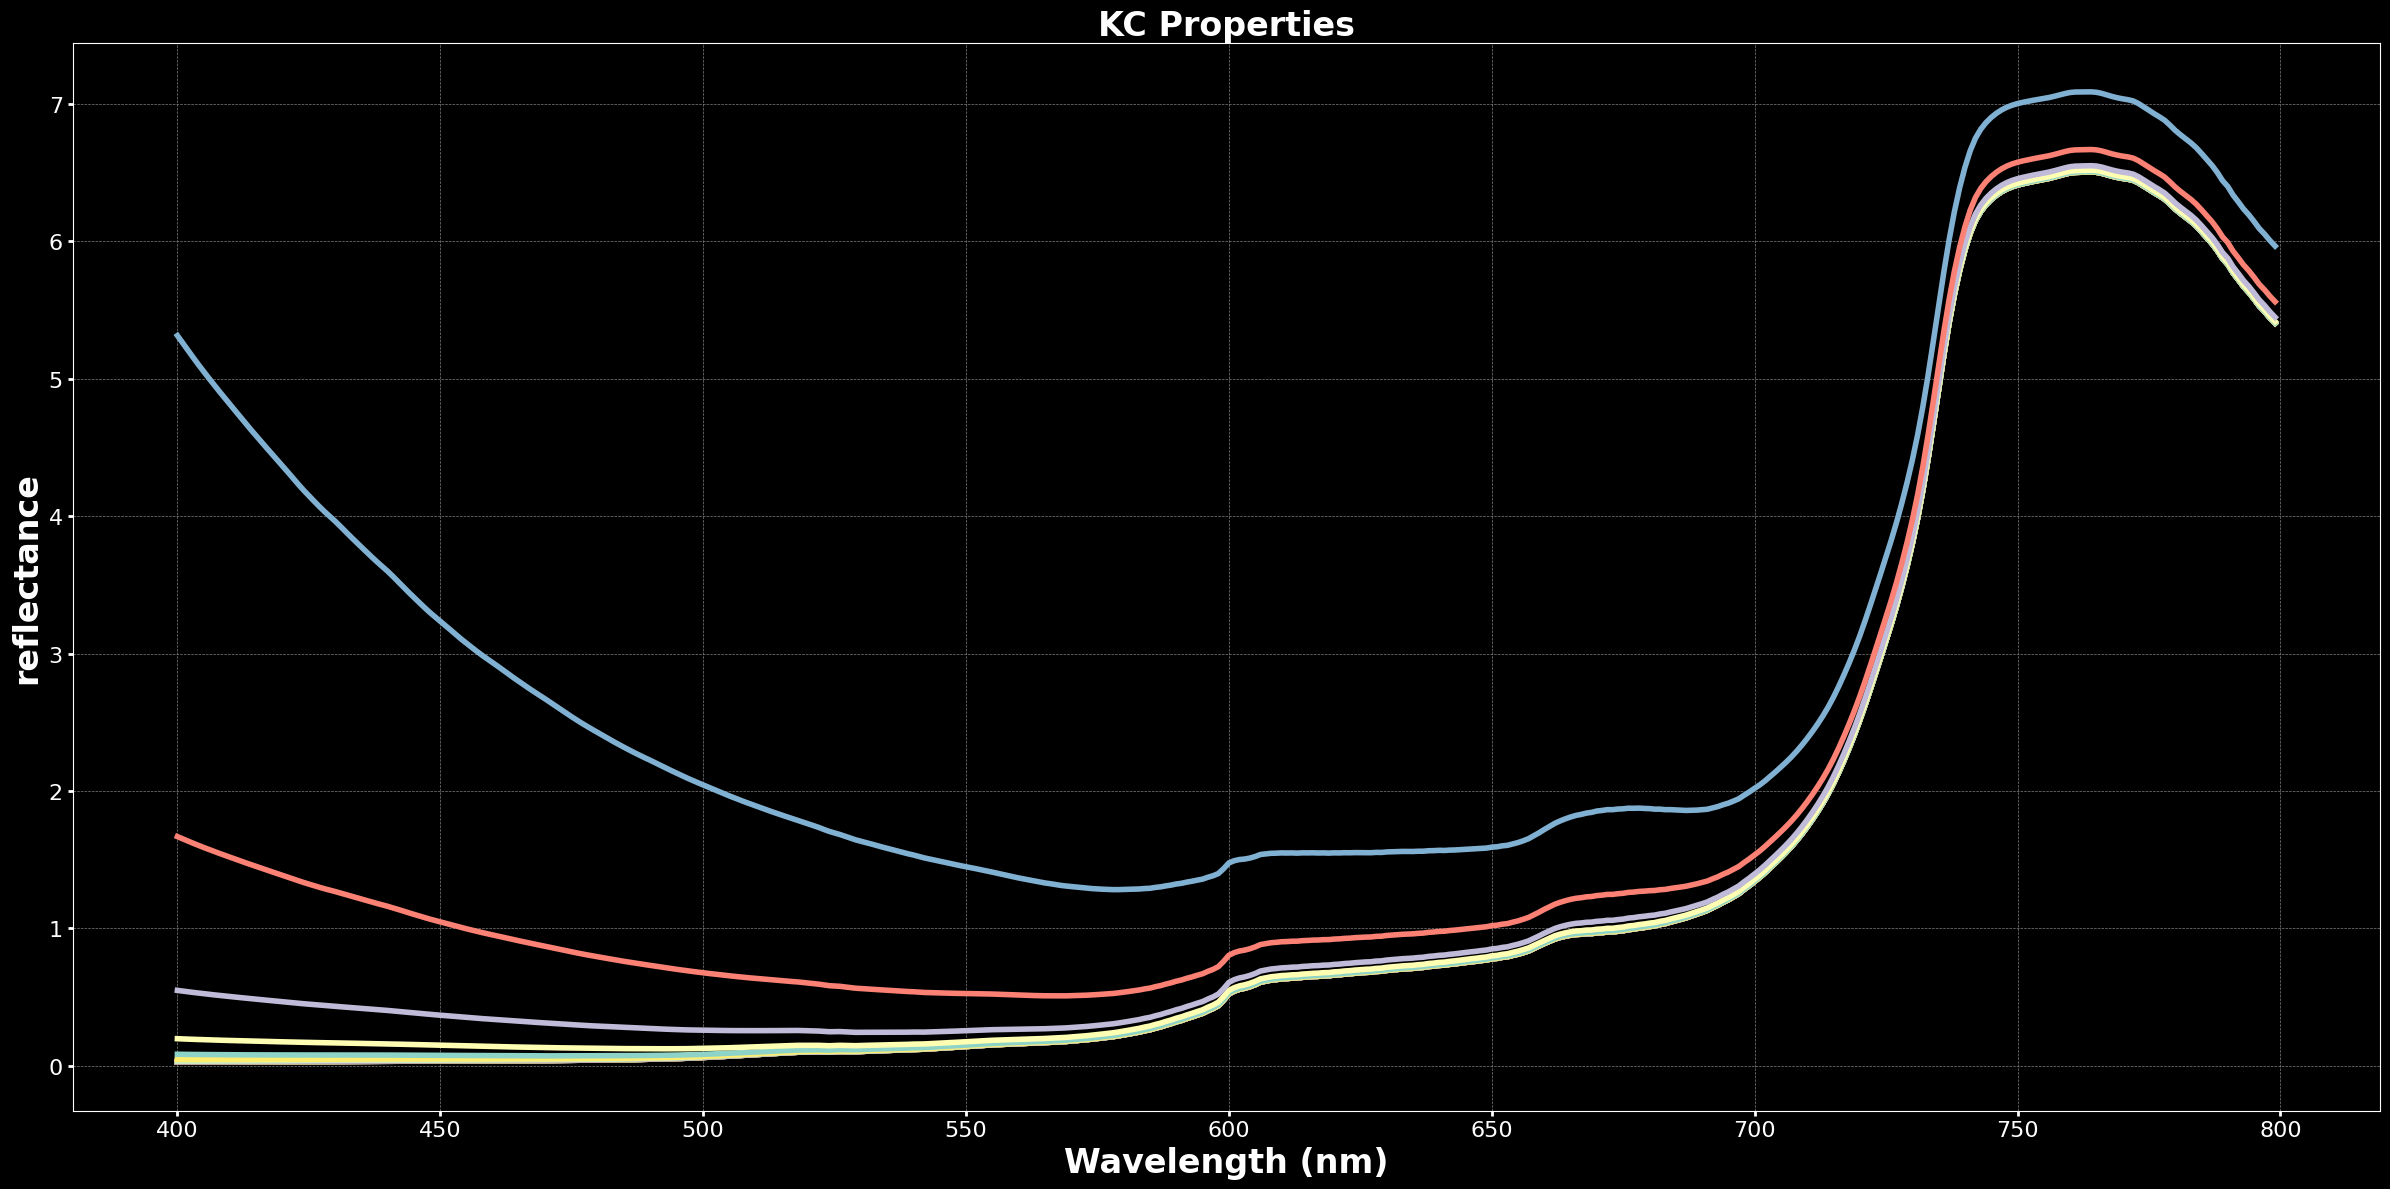

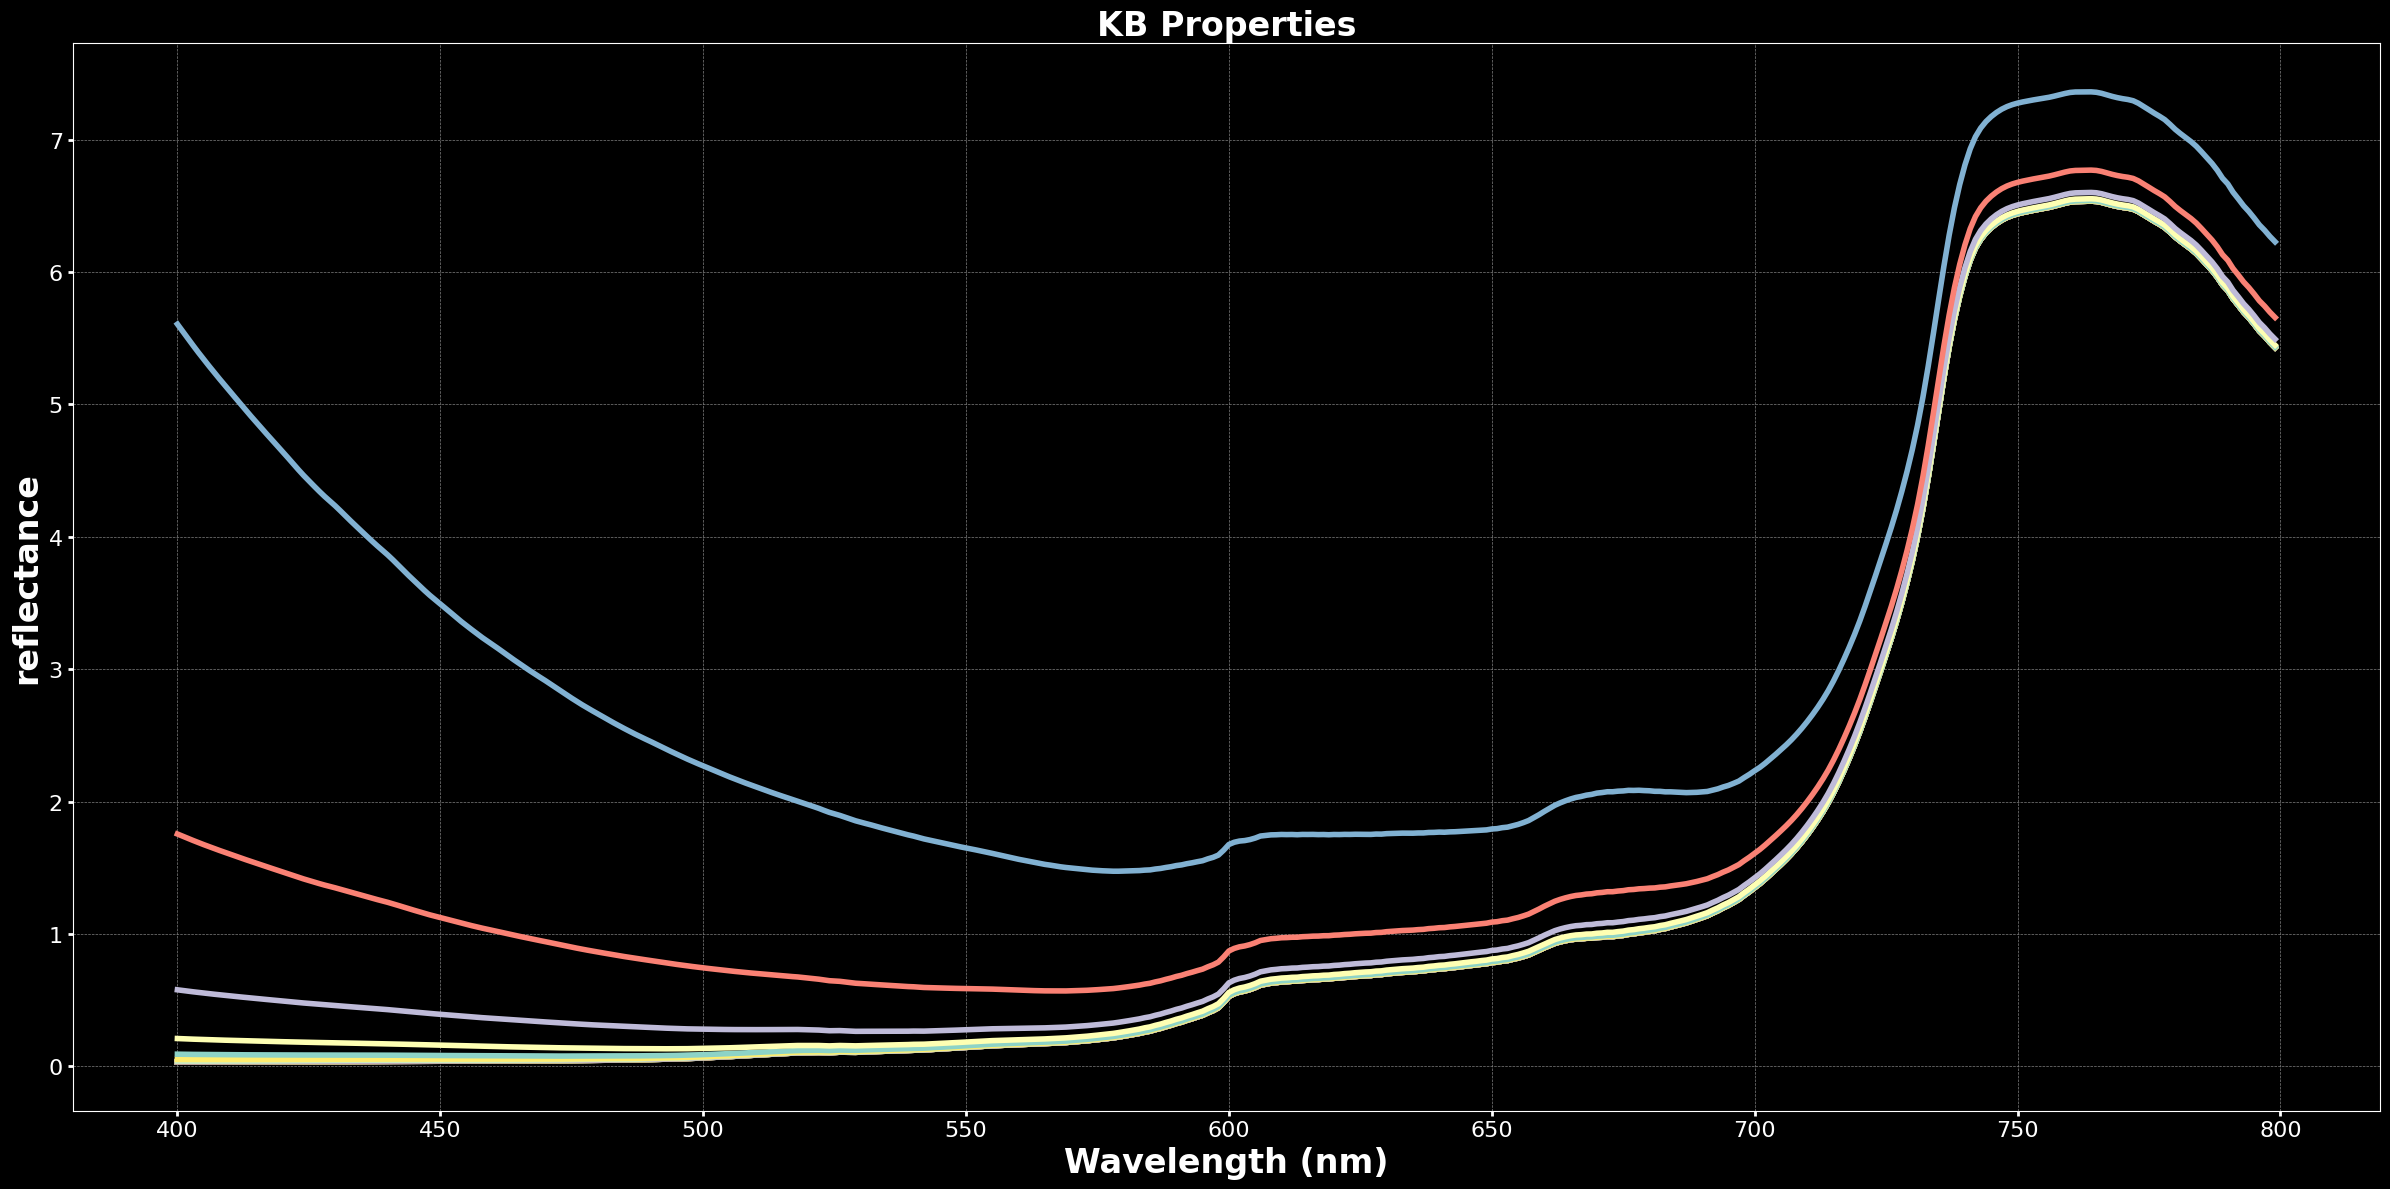

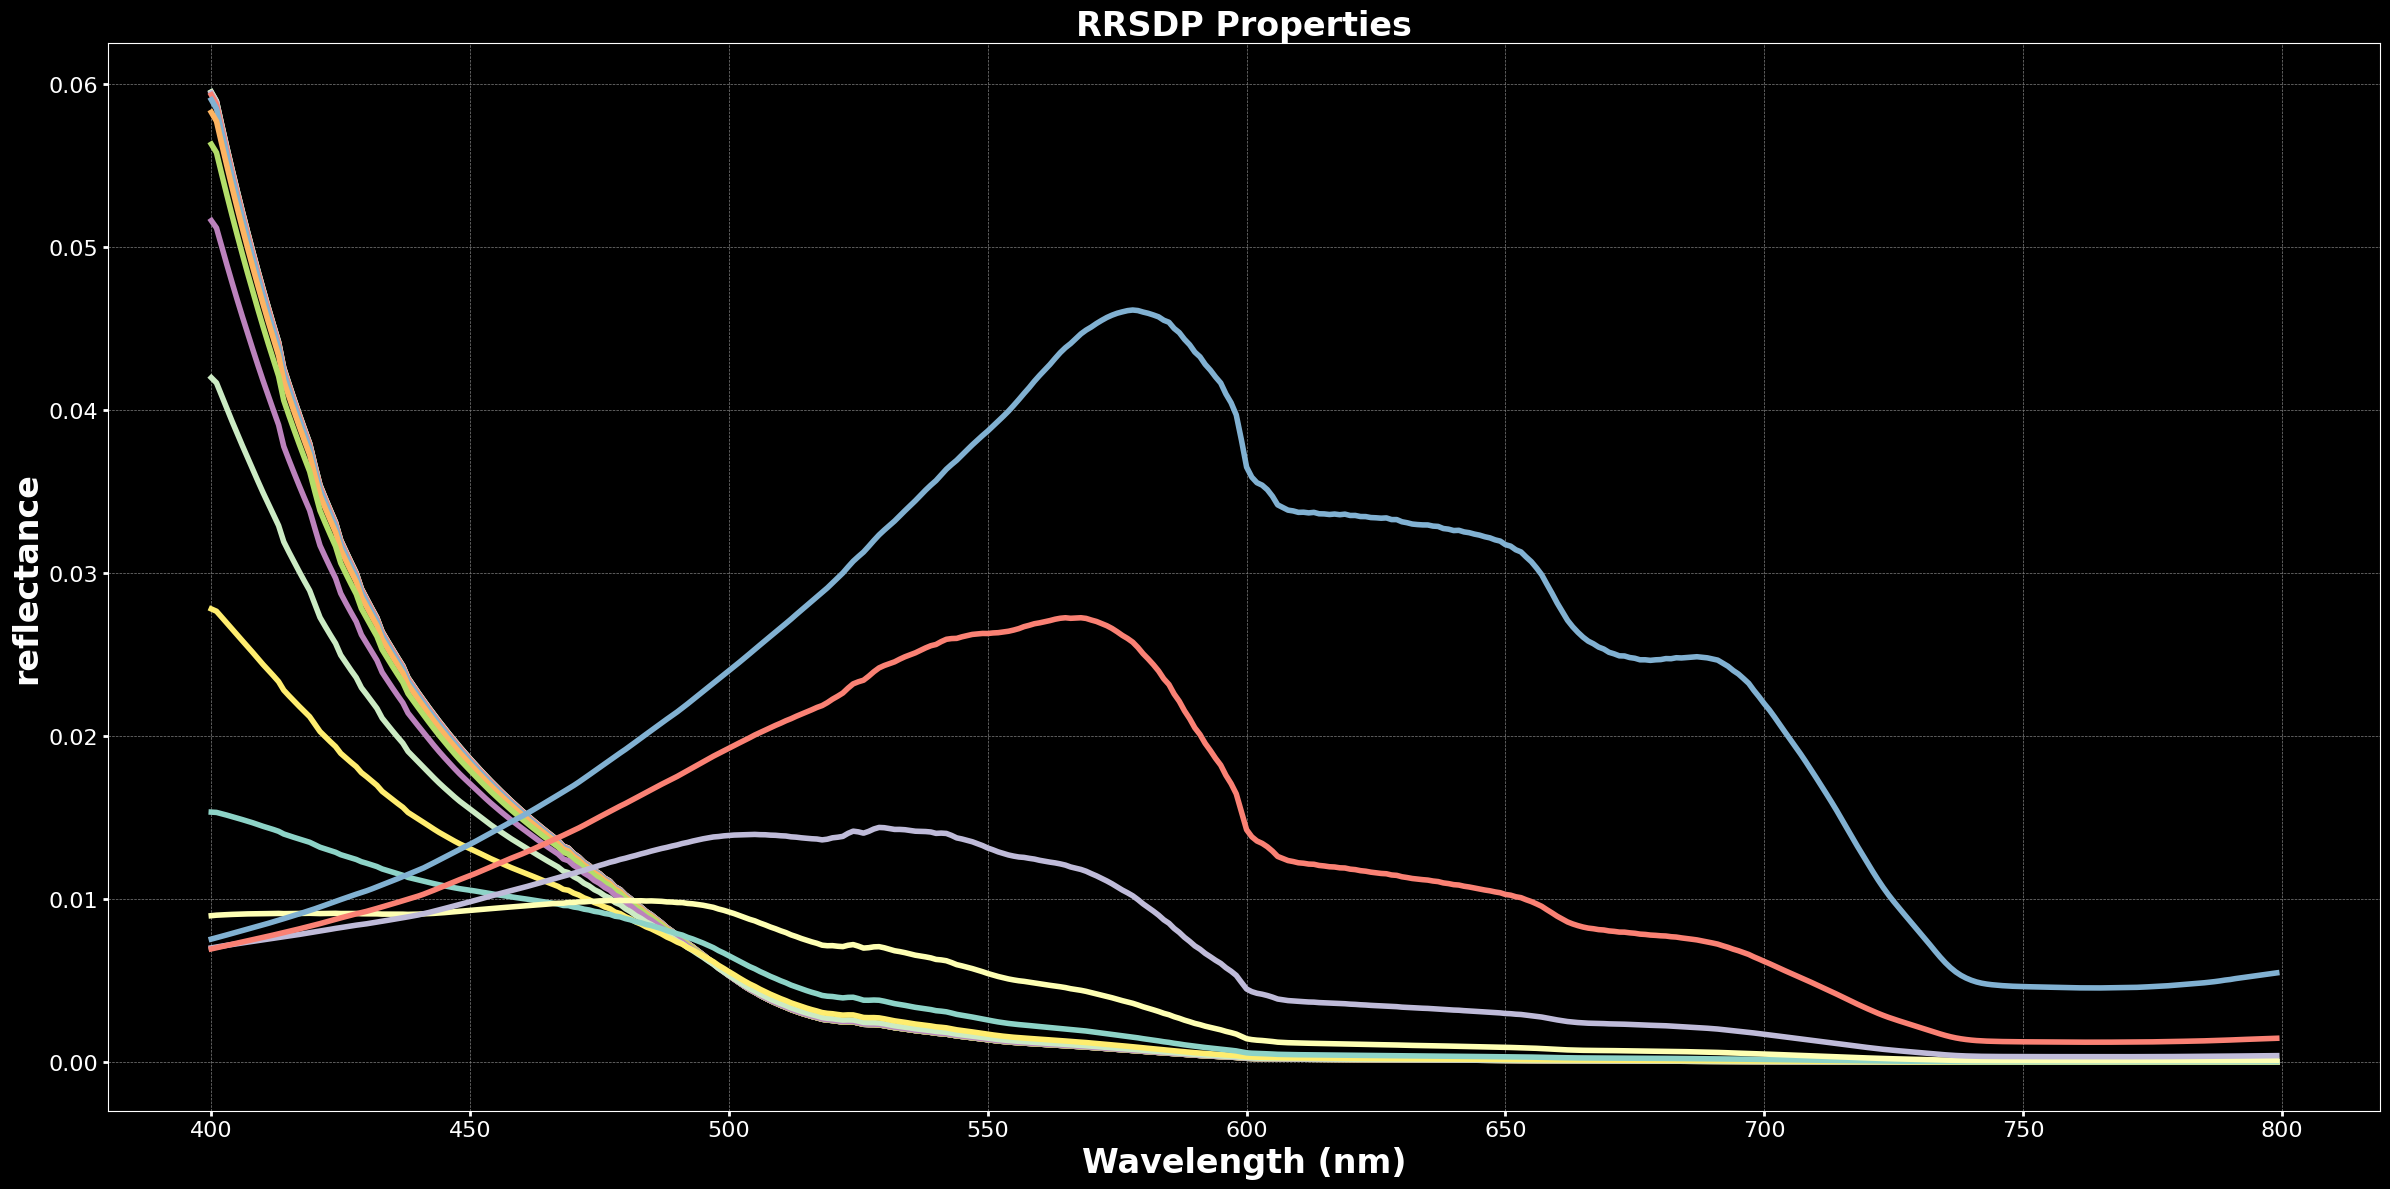

In [14]:
from sasha.model.water_aops.models.aops import *
water_aops_instance = WaterAOPs(
    wvl=wvl,
    aphy_model_option="log_bricaud",
    acdom_model_option="log_bricaud",
    anap_model_option="log_bricaud",
    bb_chl_model_option="log_bricaud",
    bb_cdom_model_option="log_bricaud",
    bb_tsm_model_option="log_bricaud", backend = BACKEND
)

# Test properties
kc_props = np.array(water_aops_instance.get_property(prop_type="kc", chl=chl, cdom=cdom, tsm=tsm))
plot_spectra(wvl, {"KC Properties": kc_props.T})

kb_props = np.array(water_aops_instance.get_property(prop_type="kb", chl=chl, cdom=cdom, tsm=tsm))
plot_spectra(wvl, {"KB Properties": kb_props.T})

rrsdp_props = np.array(water_aops_instance.get_property(prop_type="rrsdp", chl=chl, cdom=cdom, tsm=tsm))
plot_spectra(wvl, {"RRSDP Properties": rrsdp_props.T})



In [15]:
%%timeit
spectra = water_aops_instance.get_property(prop_type="kb", chl=chl, cdom=cdom, tsm=tsm)

2.32 ms ± 453 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


(<Figure size 2400x1200 with 1 Axes>,
 <Axes: title={'center': 'bottom albedo Properties'}, xlabel='Wavelength (nm)', ylabel='reflectance'>)

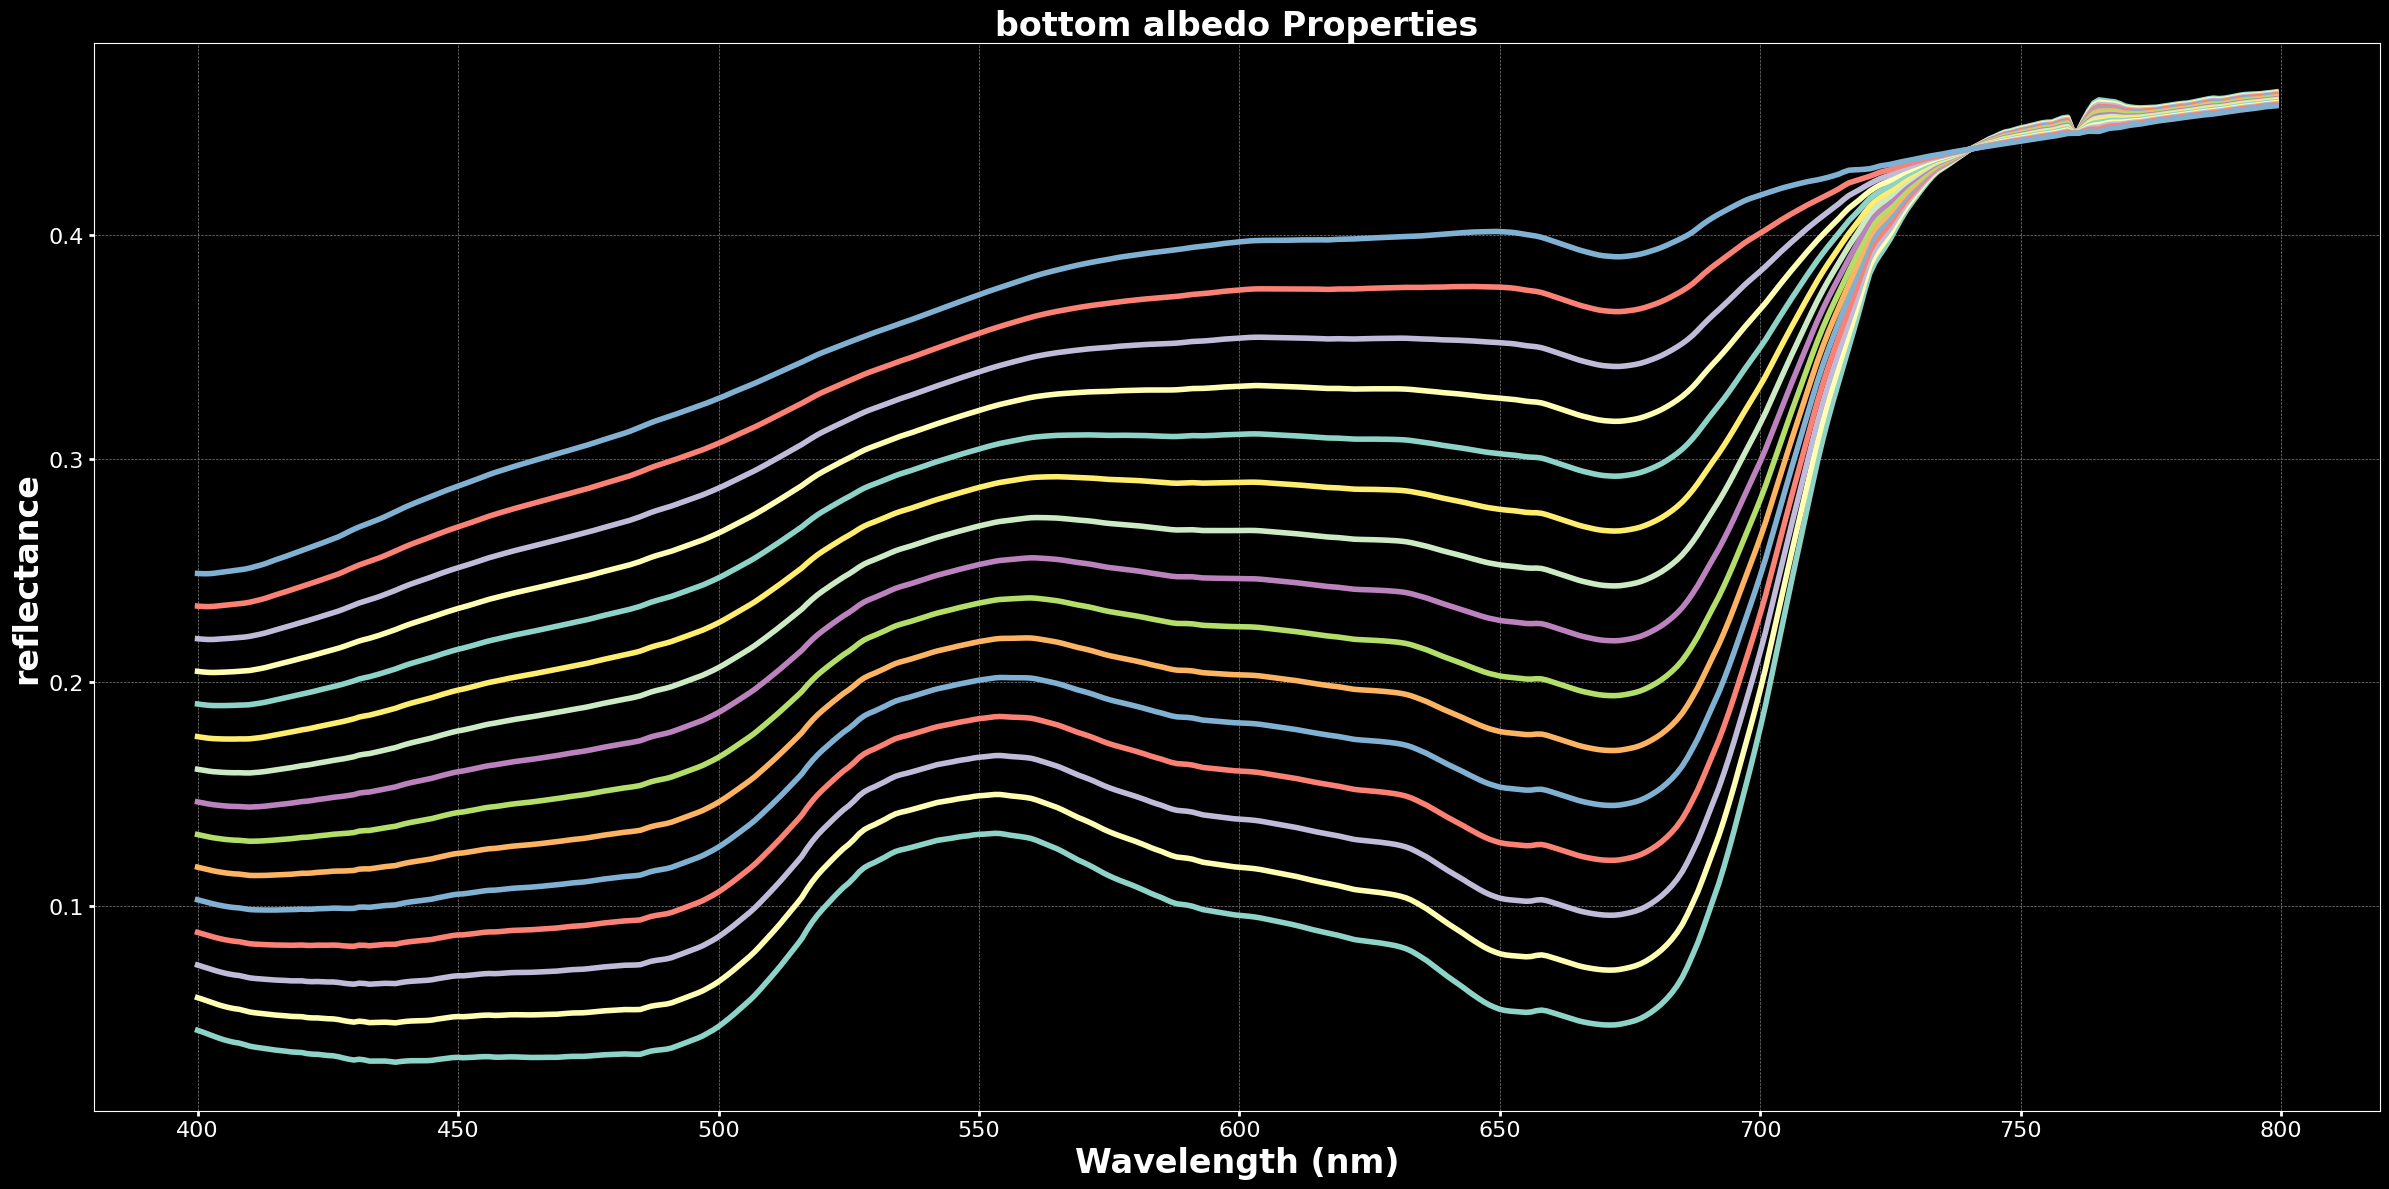

In [16]:
from sasha.model.bottom.bottom_linear import BottomLinear
# Example initialization with wavelength array and modeling option
bottom_linear_instance = BottomLinear(wvl=wvl, modeling_option="linear", backend = BACKEND)

# Test properties
property_result = np.array(bottom_linear_instance.get_property(alpha_m_1=alpha_m_1))
plot_spectra(wvl, {"bottom albedo Properties": property_result.T})

In [17]:
%%timeit
spectra = bottom_linear_instance.get_property(alpha_m_1=alpha_m_1)

362 μs ± 42.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


2025-03-25 17:21:19 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\aphys2.txt
2025-03-25 17:21:19 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\ephys2.txt
2025-03-25 17:21:19 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_micro.txt
2025-03-25 17:21:19 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_nano.txt
2025-03-25 17:21:19 - INFO - ChlAbsorptionModel - Initialized Chl Absorption Model with model option: log_bricaud
2025-03-25 17:21:19 - INFO - CdomAbsorptionModel - Initialized Cdom Absorption Model with model option: log_bricaud
2025-03-25 17:21:19 - INFO - TsmAbsorptionModel - Initialized Tsm Absorption Model with model option: log_bricaud
2025-03-25 17:21:19 -

(<Figure size 2400x1200 with 1 Axes>,
 <Axes: title={'center': 'RRSP Properties'}, xlabel='Wavelength (nm)', ylabel='reflectance'>)

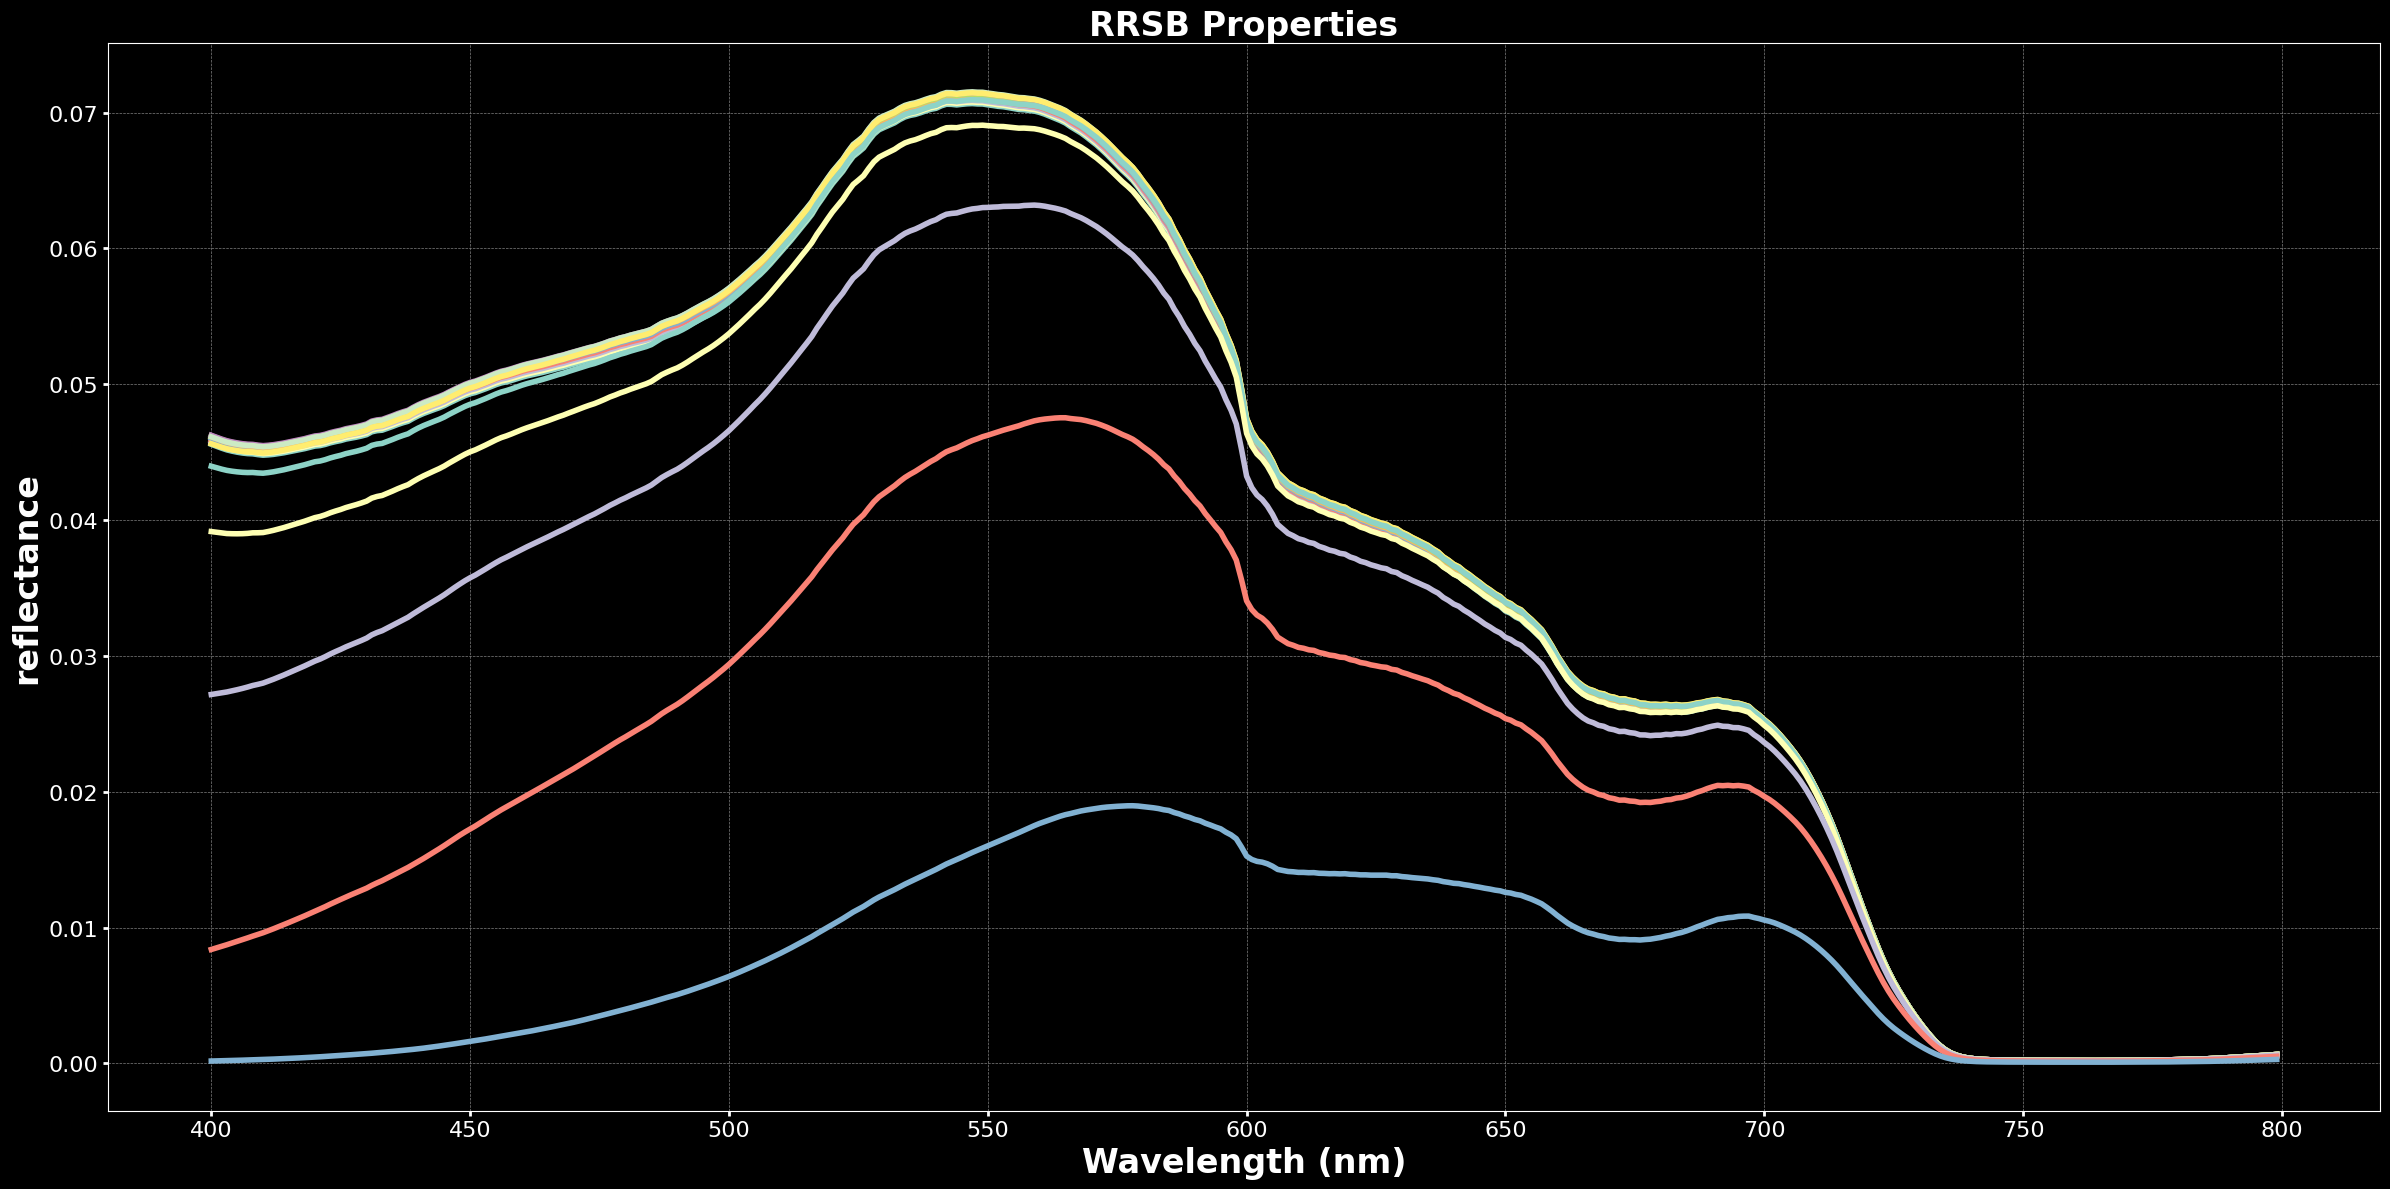

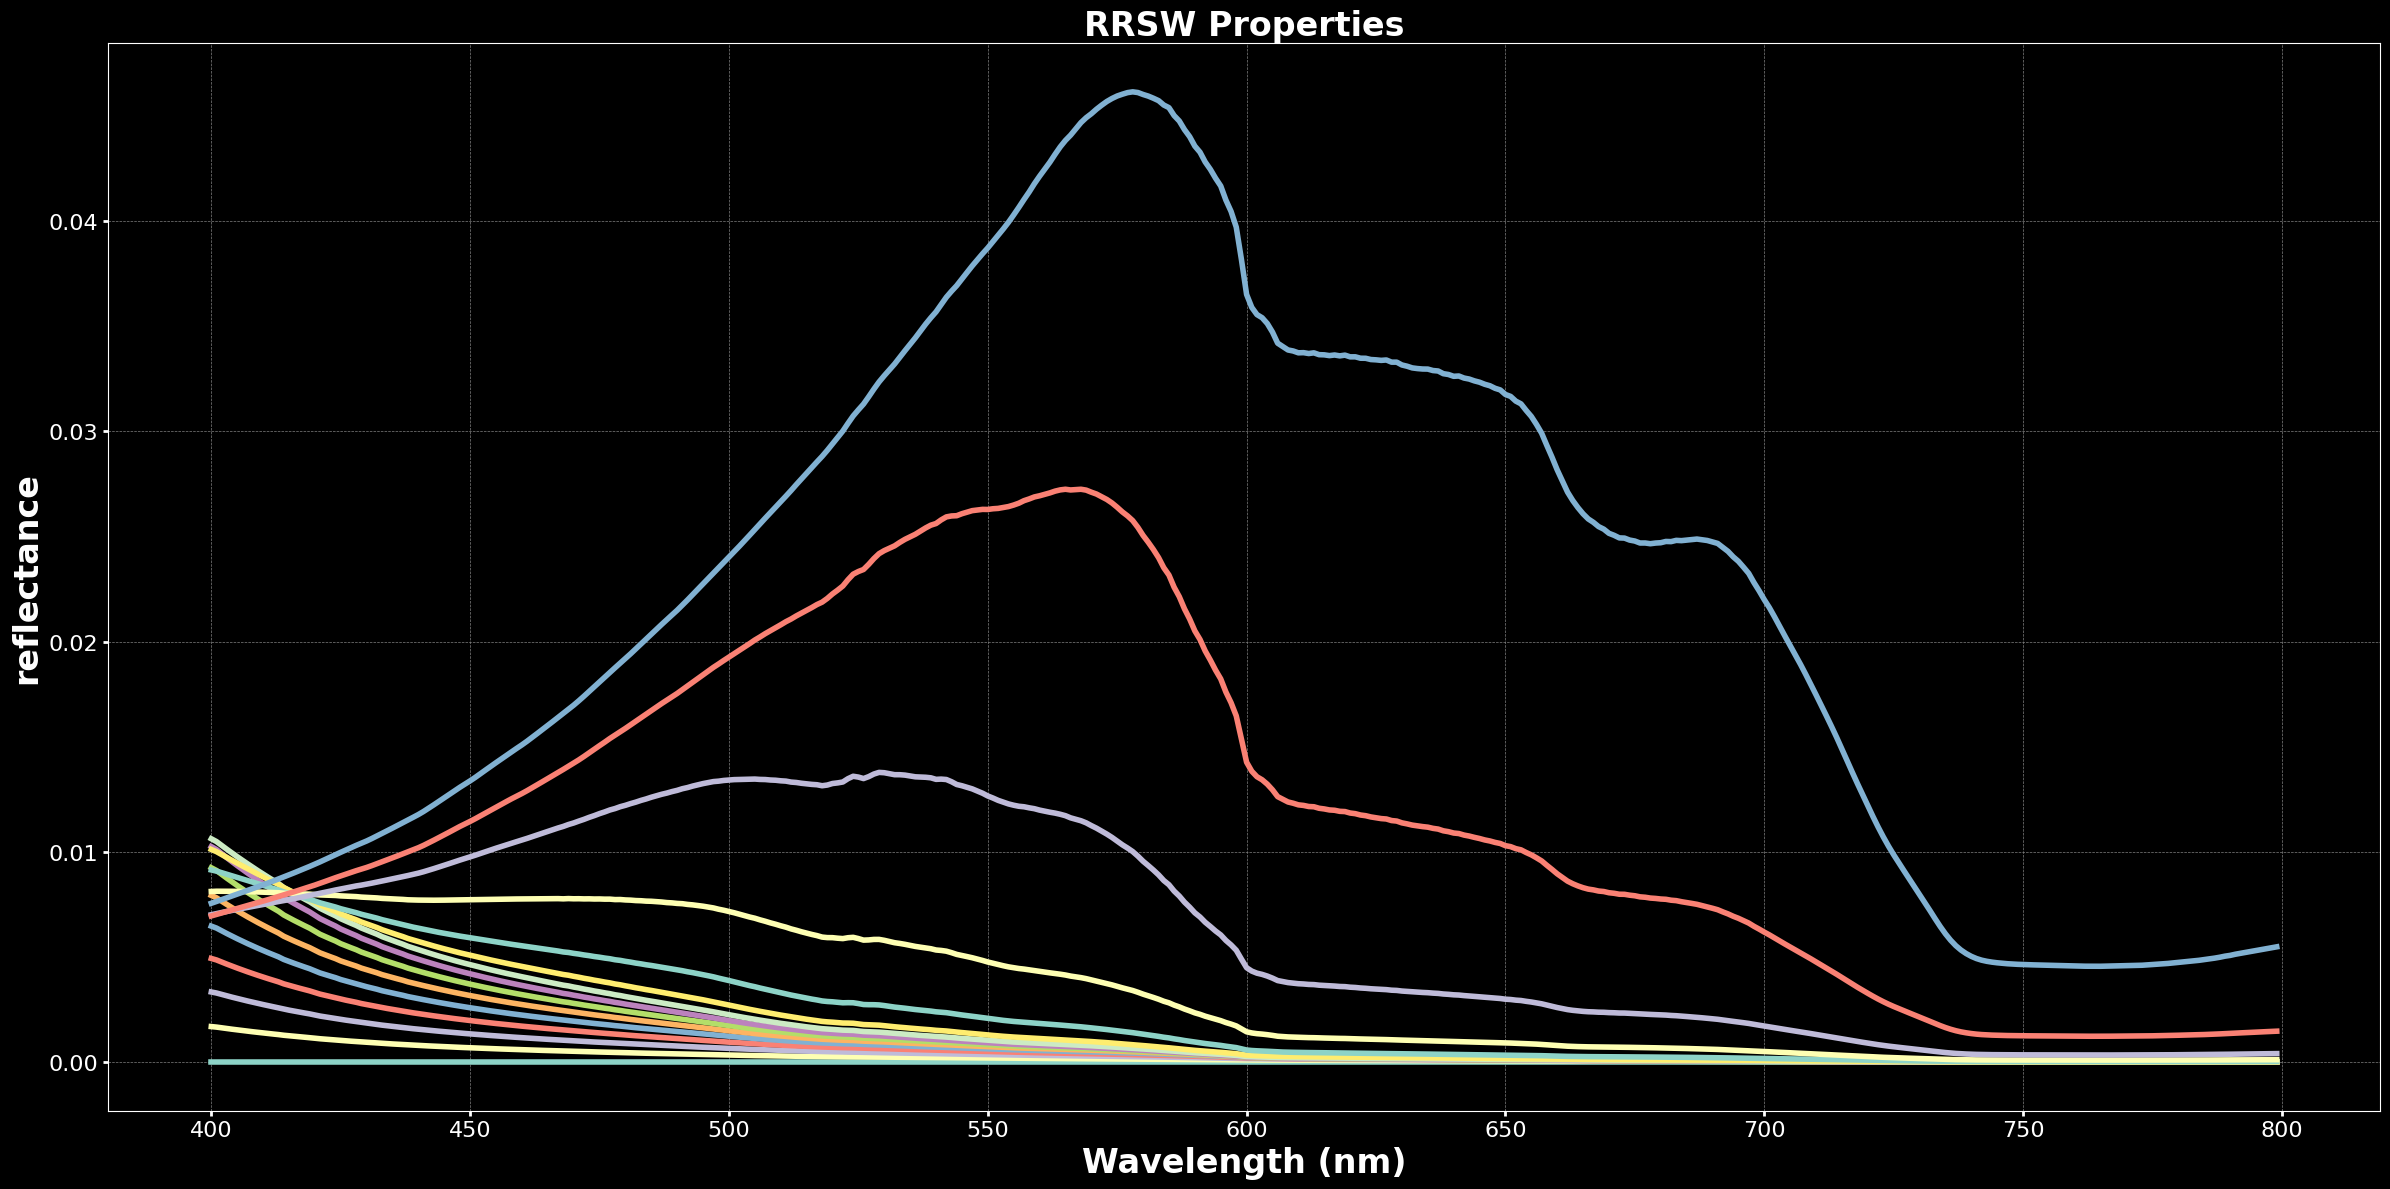

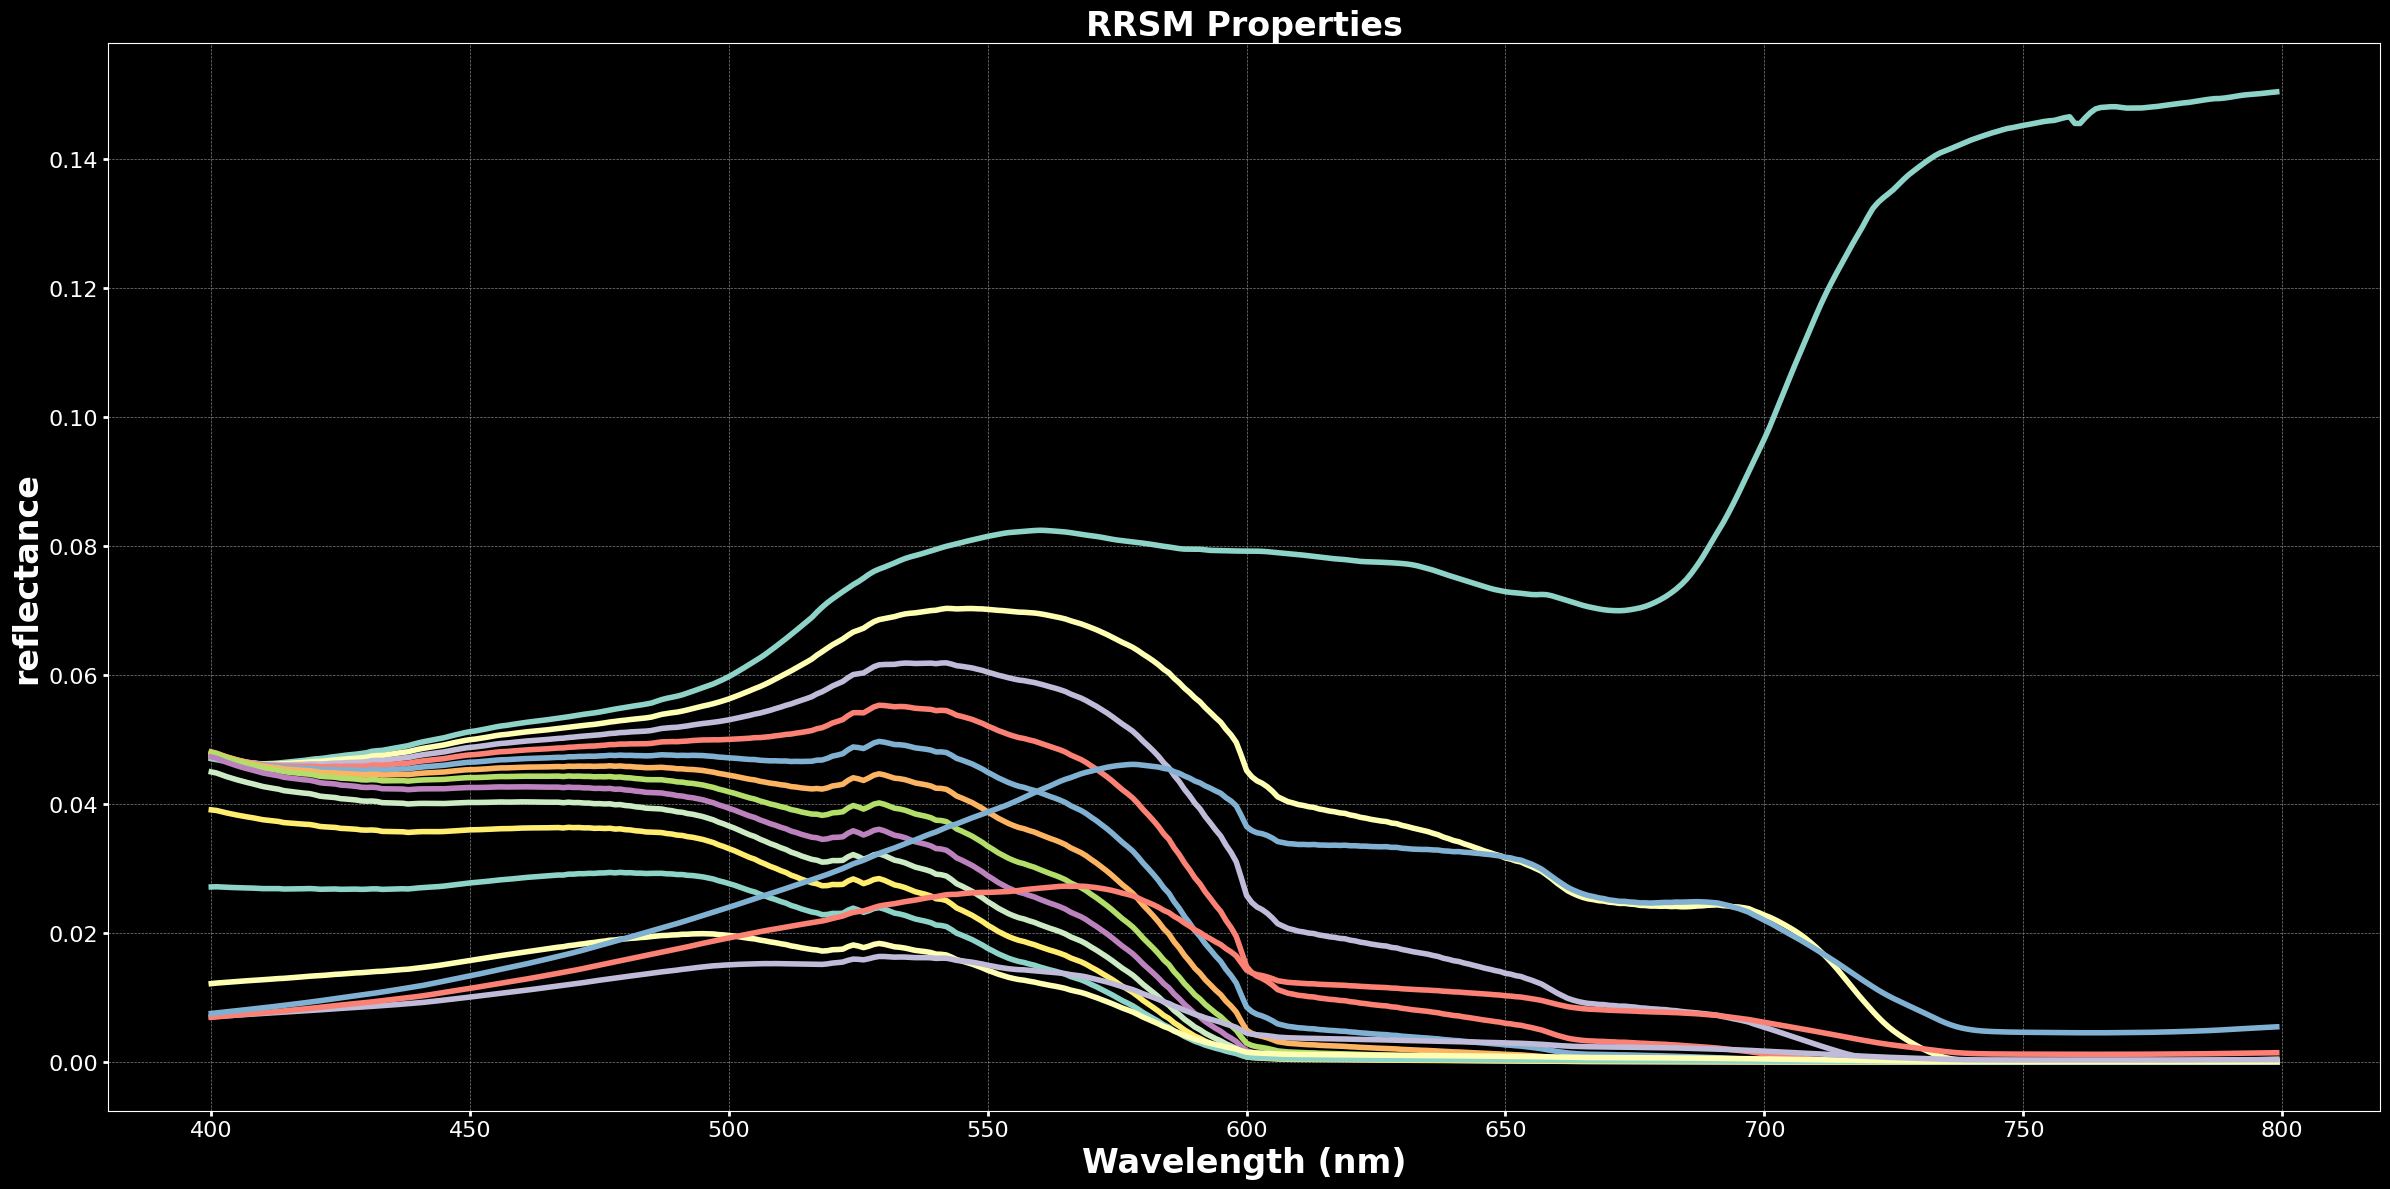

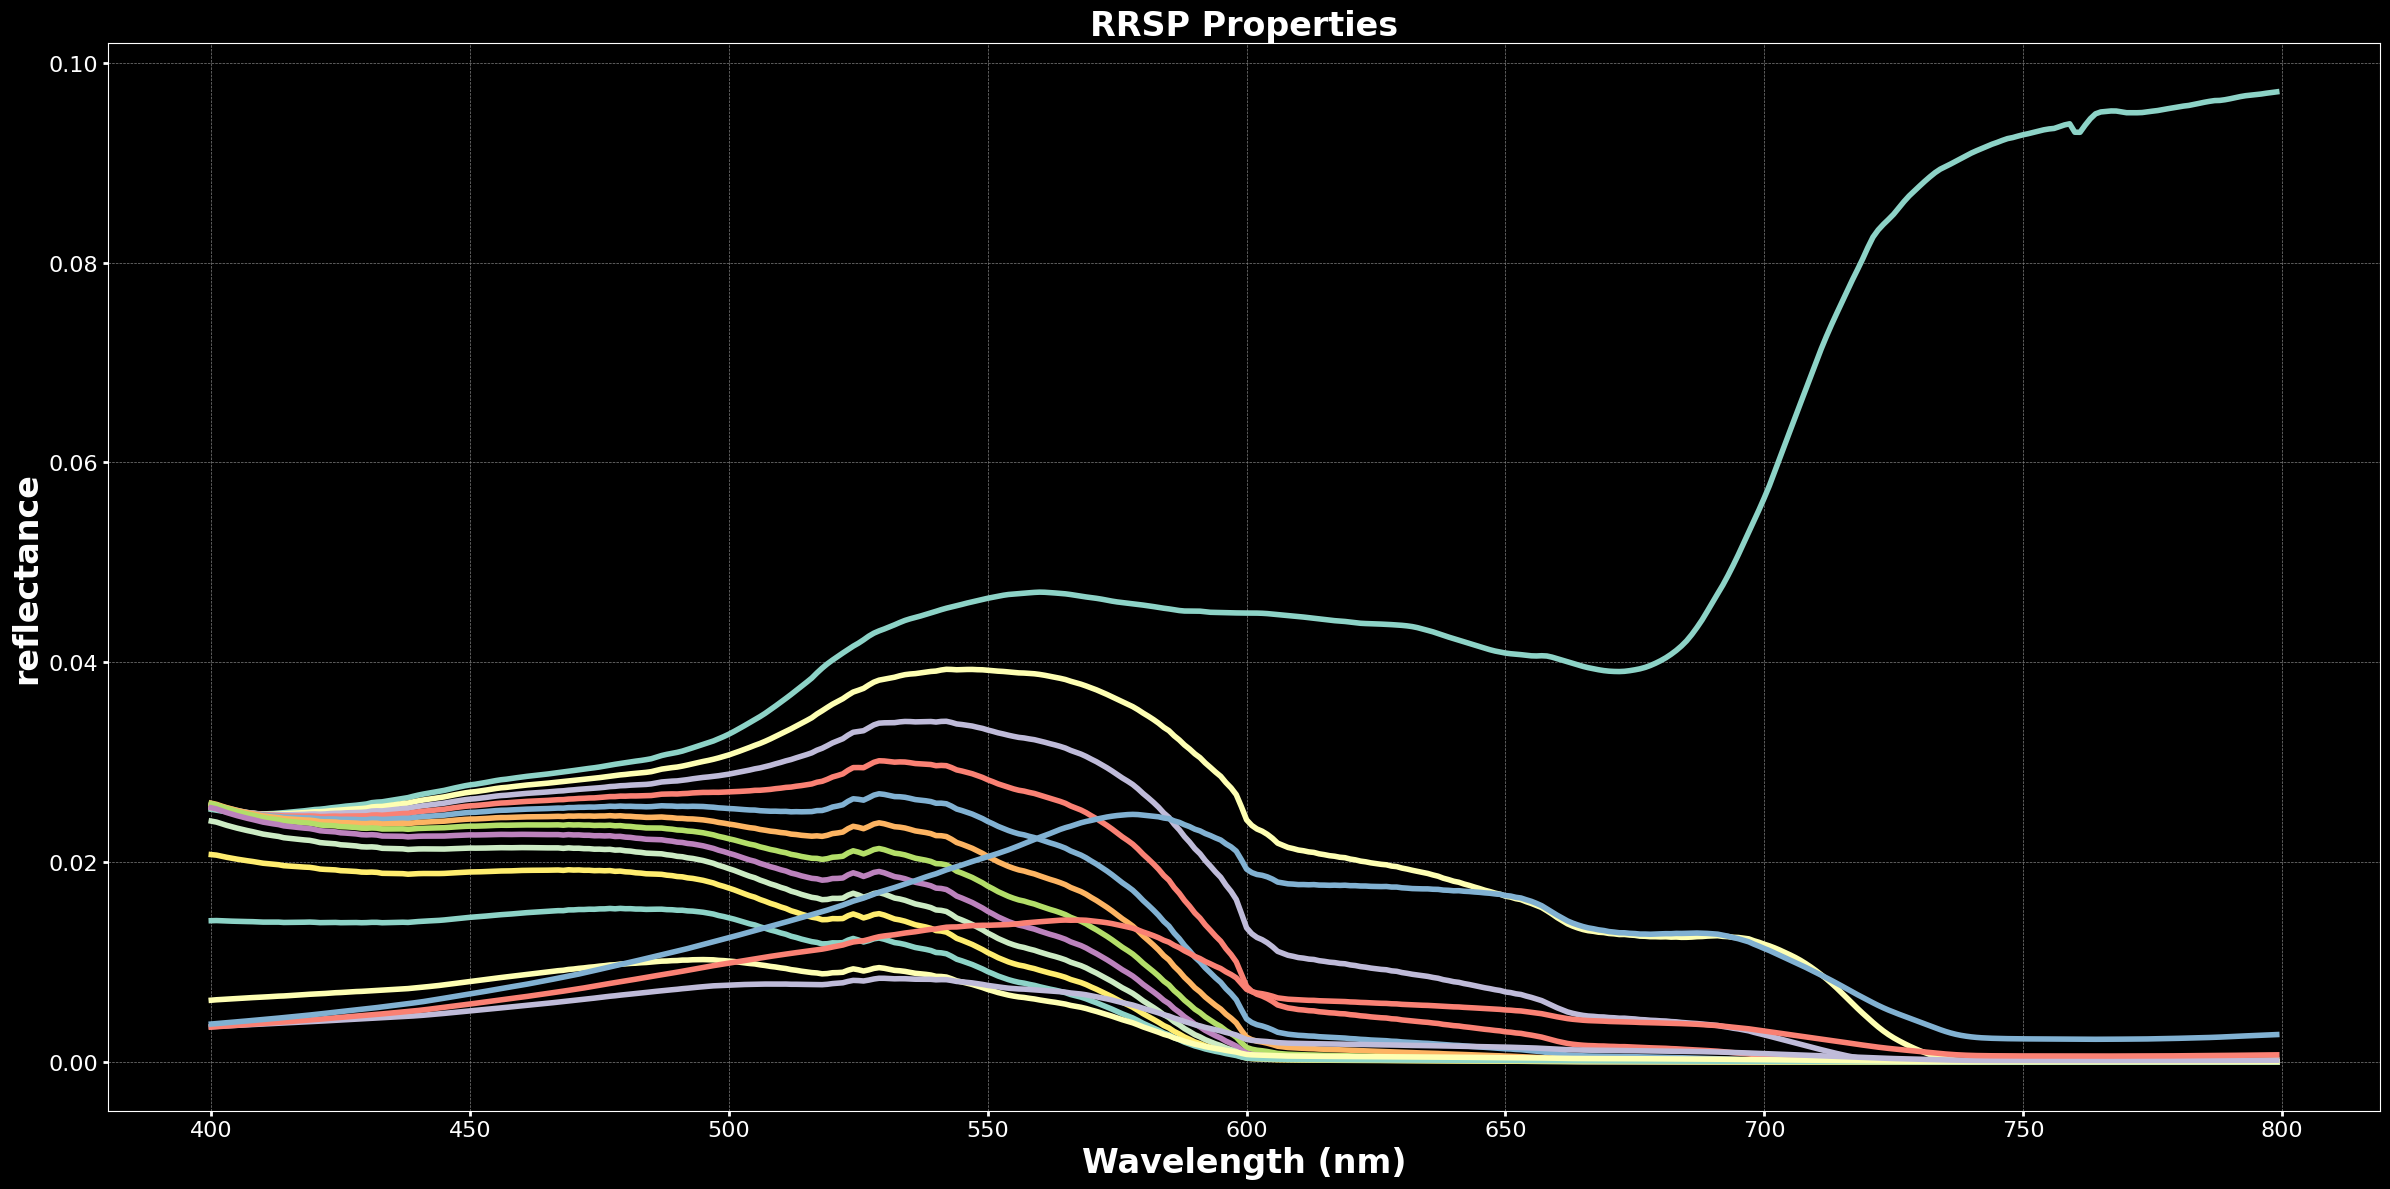

In [18]:
import tensorflow  as tf

from sasha.model.lee.lee_model import *
modeling_args = {
    "aphy_model_option": "log_bricaud",
    "acdom_model_option": "log_bricaud",
    "anap_model_option": "log_bricaud",
    "bb_chl_model_option": "log_bricaud",
    "bb_cdom_model_option": "log_bricaud",
    "bb_tsm_model_option": "log_bricaud",
    "bottom_model_option": "sigmoid"
}

lee_model_instance = LeeModel(
    wvl=wvl,**modeling_args, backend = BACKEND
)




# # Test properties
rrsb_props = np.array(lee_model_instance.get_property(z = 1, alpha_m_1=alpha_m_1, chl=chl, cdom=cdom, tsm=tsm, prop_type="rrsb")).T
plot_spectra(wvl, {"RRSB Properties": rrsb_props})

rrsw_props = np.array(lee_model_instance.get_property(z = z, alpha_m_1=alpha_m_1, chl=chl, cdom=cdom, tsm=tsm, prop_type="rrsw")).T
plot_spectra(wvl, {"RRSW Properties": rrsw_props})


rrsm_props = np.array(lee_model_instance.get_property(z = z, alpha_m_1=alpha_m_1, chl=chl, cdom=cdom, tsm=tsm, prop_type="rrsm")).T
plot_spectra(wvl, {"RRSM Properties": rrsm_props})


rrsp_props = np.array(lee_model_instance.get_property(z = z, alpha_m_1=alpha_m_1, chl=chl, cdom=cdom, tsm=tsm, prop_type="rrsp")).T
plot_spectra(wvl, {"RRSP Properties": rrsp_props})






In [19]:
%%timeit
res = lee_model_instance.get_property(z = z, alpha_m_1=alpha_m_1, chl=chl, cdom=cdom, tsm=tsm, prop_type="rrsm")

6.05 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


2025-03-25 17:21:28 - INFO - DesignResponse - Loading response data for model: sentinel_2A
2025-03-25 17:21:32 - INFO - DesignResponse - Computing response matrix
2025-03-25 17:21:32 - INFO - DesignResponse - Response matrix initialization completed
2025-03-25 17:21:32 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\aphys2.txt
2025-03-25 17:21:32 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\ephys2.txt
2025-03-25 17:21:32 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_micro.txt
2025-03-25 17:21:32 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_nano.txt
2025-03-25 17:21:32 - INFO - ChlAbsorptionModel - Initialized Chl Absorption Model with model option: log_bricaud
2

Sampled Reflectance: (7, 15)


(<Figure size 2400x1200 with 1 Axes>,
 <Axes: title={'center': 'Sampled Reflectance'}, xlabel='Wavelength (nm)', ylabel='reflectance'>)

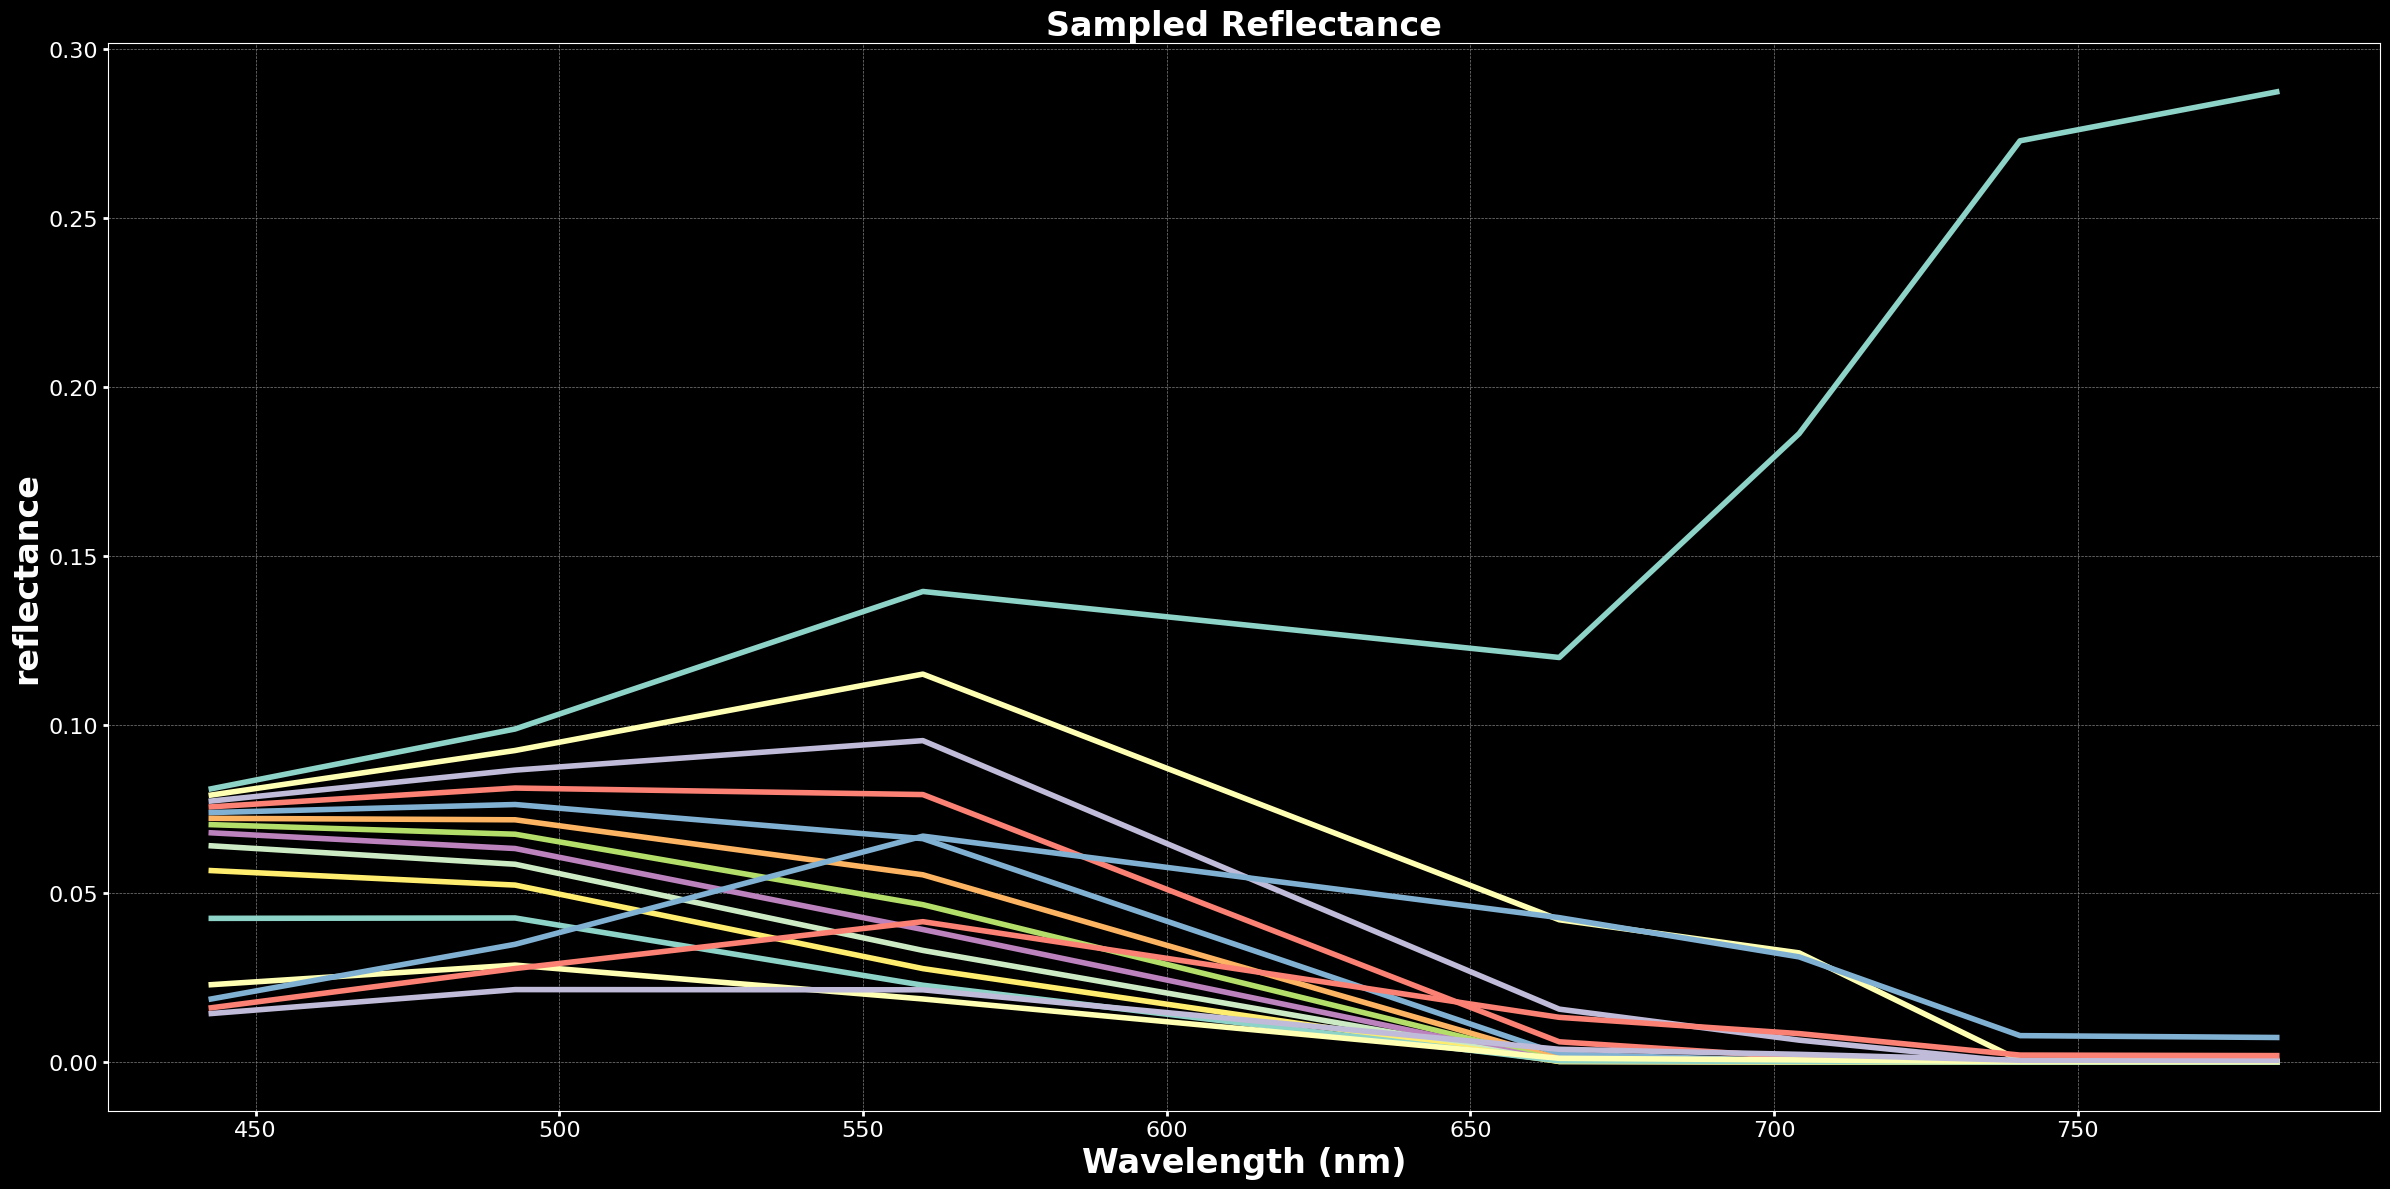

In [20]:
from   sasha.model.radiometry.radiometry import Radiometry
from   sasha.model.design.design_base import Design
import tensorflow as tf
from   sasha.model.lee.lee_model import *
import numpy as np
from   sasha.utils.plotting import plot_spectra

# Initialize DesignResponse
modeling_args = {
    "aphy_model_option": "log_bricaud",
    "acdom_model_option": "log_bricaud",
    "anap_model_option": "log_bricaud",
    "bb_chl_model_option": "log_bricaud",
    "bb_cdom_model_option": "log_bricaud",
    "bb_tsm_model_option": "log_bricaud",
    "bottom_model_option": "sigmoid"
}

design_response_instance = Design(model_option="sentinel_2A", wvl=wvl)
lee_model_instance = LeeModel(wvl=design_response_instance.wvl,**modeling_args, backend = BACKEND)

# Initialize Radiometry
radiometry_instance = Radiometry( design=design_response_instance, response_matrix = design_response_instance.response_matrix,
    reflectance_model=lee_model_instance,  # Assuming the same instance for simplicity
    prop_type="rrsp", backend = BACKEND)

# Sampled reflectance computation   
parameters = {'nconv' : 1.5}  # Your parameters here
sampled_reflectance = np.array(radiometry_instance.sampled_reflectance(z =z, alpha_m_1=alpha_m_1, chl=chl, cdom=cdom, tsm=tsm,**parameters)).T
print("Sampled Reflectance:", sampled_reflectance.shape)
plot_spectra(design_response_instance.bands, {"Sampled Reflectance": sampled_reflectance})

In [21]:
%%timeit
spectra = radiometry_instance.sampled_reflectance(z=z, alpha_m_1=alpha_m_1, chl=chl, cdom=cdom, tsm=tsm, **parameters)

6.16 ms ± 857 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
